# EasyWater
# Potable water identification using Data Mining

### Made by: ElQuecass
### Professor: Luis Miguel Pellegrin

**All computational experiments and reported processing times were conducted on a DELL Inspiron 15 laptop with the following specifications:**

# **Hardware Environment:**

**Processor (CPU):**
* AMD Ryzen 7 7730U
* Base Speed: 2 GHz
* 8 Cores / 16 Logical Processors
* Average Speed: 3.80 GHz

**Graphics (GPU):**
* AMD Radeon Graphics Unit
* 8 GB Dedicated Memory
 
**Memory (RAM):**
* 16 GB DDR4
* Speed: 3200 MT/s
* Configured in a dual-channel setup.

# Project Preparation

### Debugging

In [1]:
debugging = True

## Libraries

In [2]:
# =============================================================================
# DATA HANDLING & EXPLORATION
# =============================================================================
import numpy as np    # For fast numerical operations.
import pandas as pd   # For structured data (like tables).

# =============================================================================
# VISUALIZING DATA
# =============================================================================
import matplotlib.pyplot as plt  # General plotting.
import seaborn as sns          # Enhanced statistical plots.

# =============================================================================
# DATA PREPARATION
# =============================================================================
from sklearn.preprocessing import RobustScaler # Adjusting data ranges.
from sklearn.impute import SimpleImputer      # Handling missing values.

# =============================================================================
# MACHINE LEARNING ALGORITHMS
# =============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# =============================================================================
# MODEL EVALUATION
# =============================================================================
from sklearn.model_selection import (
    train_test_split,    # Splitting data for testing.
    cross_val_predict    # Robust model validation.
)

from sklearn.metrics import (
    accuracy_score,      # Overall correctness.
    f1_score,            # Balanced performance metric.
    confusion_matrix,    # Detailed prediction breakdown.
    precision_score,     # Accuracy of positive predictions.
    recall_score,        # Ability to find all positive cases.
    roc_curve,           # Curve for classifier performance.
    auc,                 # Area under the curve.
    roc_auc_score        # Overall ROC performance score.
)

# =============================================================================
# UTILITIES
# =============================================================================
from tqdm import tqdm # To show progress for long tasks.

# Preprocessing

### Draft Creation

In [3]:
try:
    df = pd.read_csv("Watera.csv")
    print("✅ CSV correctly loaded.")
    df.to_csv('draft.csv', index=False)
    print("✅ Draft correctly created.")

except FileNotFoundError:
    print("⚠️ Error: File 'Watera.csv' not founded. Verify the route.")
except Exception as e:
    print(f"⚠️ An error ocurred: {e}")

✅ CSV correctly loaded.
✅ Draft correctly created.


We create a draft in order to not manipulate the original data.

----

### DF features

In [4]:
df = pd.read_csv('draft.csv')
df.head()

ph  hardness     tds  chlorine  sulfate  conductivity  organic_carbon  \
0  7.14    440.98  614.26      2.12   208.39        350.92            7.22   
1  6.41    242.82  387.89      3.93   313.10        153.36            9.92   
2  6.29    133.09  225.55      1.46   332.04       1420.43            8.76   
3  7.39     71.89  459.23      0.56   609.63      24142.89            9.62   
4  6.31    273.01  308.99      0.64    52.59        196.85            1.05   

   trihalomethanes  turbidity  potability  
0            17.32       2.23           0  
1            20.69       2.07           0  
2            32.87       5.05           0  
3            42.80       2.26           0  
4           133.38       5.30           0

We analyze the features of the DF

----

### DF information ### 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


This is important because we can check for missing values and knowing first hand if the columns are in the right data type.

---

## Null data verification

In [6]:
null_counts = df.isnull().sum()
print("=" * 50)
print("Null Data Report")
print("=" * 50)

if null_counts.sum() > 0:
    print(f"Total null values: {null_counts.sum()}\n")
    print(null_counts[null_counts > 0].to_string(name="Column (Nulls)"))  # Shows only columns with nulls
    print("=" * 50)

else:
    print("✅ No null data.")

Null Data Report
Total null values: 7916

ph              3121
tds             2384
sulfate          813
conductivity    1598


We create a report of the data that's missing in the dataset.

---

## ***Null data*** cleaning

In [7]:
from sklearn.impute import SimpleImputer
import pandas as pd

print("\n" + "="*50)
print("🧹 Null Data Cleaning (Median Imputation) 🧹")
print("="*50 + "\n")

null_counts = df.isnull().sum()
cols_with_nulls = null_counts[null_counts > 0].index.tolist()

if not cols_with_nulls:
    print("✅ No null data found in the DataFrame.\n")
else:
    print(f"⚠️ Found null data in the following columns: {cols_with_nulls}\n")
    imputer_median = SimpleImputer(strategy='median')
    df[cols_with_nulls] = imputer_median.fit_transform(df[cols_with_nulls])
    print(f"✅ Null data in columns {cols_with_nulls} have been replaced with the median.\n")

print("="*50 + "\n")

df.to_csv("Draft.csv", index=False)


🧹 Null Data Cleaning (Median Imputation) 🧹

⚠️ Found null data in the following columns: ['ph', 'tds', 'sulfate', 'conductivity']

✅ Null data in columns ['ph', 'tds', 'sulfate', 'conductivity'] have been replaced with the median.




> Instead of just delete them, i made the replace because it was too aggresive to just delete everything.

## Statistical Analysis for ***Atypical Values***

In [8]:
df.describe()

ph       hardness            tds       chlorine  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        7.249216     309.214750     328.788350       2.500058   
std         0.979959     222.321384     243.258211       1.616047   
min         5.000000       0.000000       0.030000       0.000000   
25%         6.520000     151.540000     163.197500       1.230000   
50%         7.240000     271.080000     270.155000       2.410000   
75%         7.950000     391.580000     375.820000       3.570000   
max         9.990000    1099.990000    1099.990000       8.990000   

             sulfate   conductivity  organic_carbon  trihalomethanes  \
count  100000.000000  100000.000000   100000.000000    100000.000000   
mean      252.830514    1999.029623        7.198689        72.739010   
std       152.339570    3996.970819        3.507656        50.389586   
min         0.000000       0.040000        0.000000         0.000000   
25%       138.730000     726.235000        4.710000        29.997500   
50%       237.050000    1438.565000        7.300000        68.010000   
75%       335.712500    2151.095000        9.840000       105.700000   
max       799.970000   39961.990000       17.990000       229.960000   

           turbidity     potability  
count  100000.000000  100000.000000  
mean        3.139499       0.076160  
std         2.417457       0.265255  
min         0.000000       0.000000  
25%         1.450000       0.000000  
50%         2.660000       0.000000  
75%         4.300000       0.000000  
max        13.990000       1.000000

In the first checking of the df (And everytime before dealing with it) we can see that our df has a lot of atypical values.

## Atypical Value Capping


📊 Atypical Value Capping (Boxplots + Histograms)



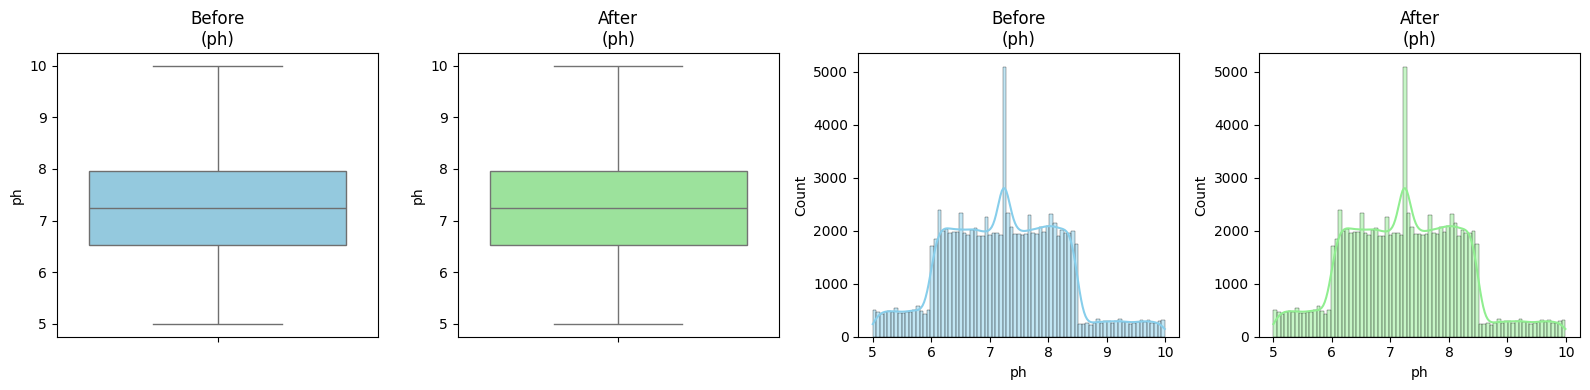

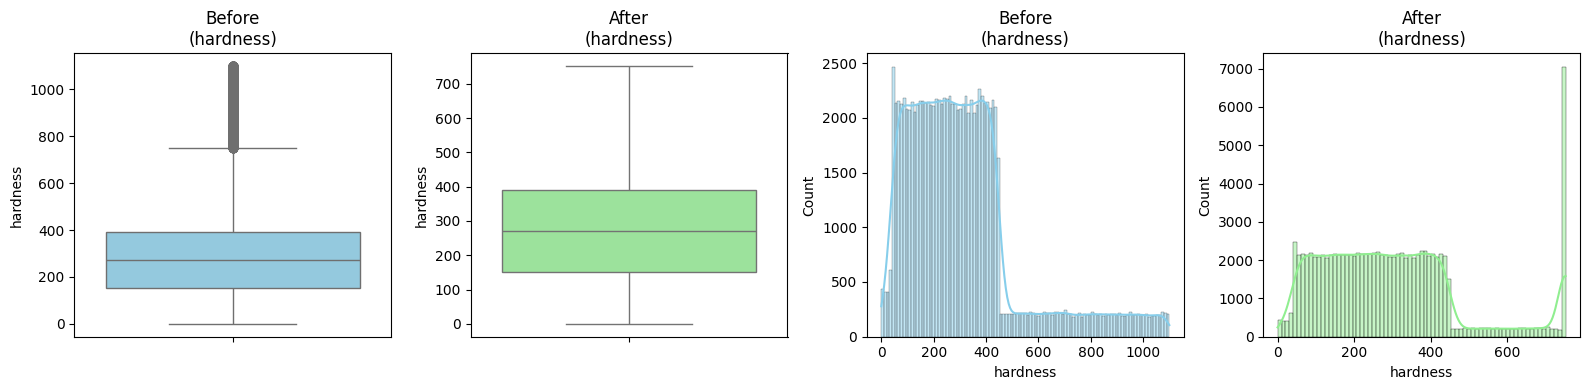

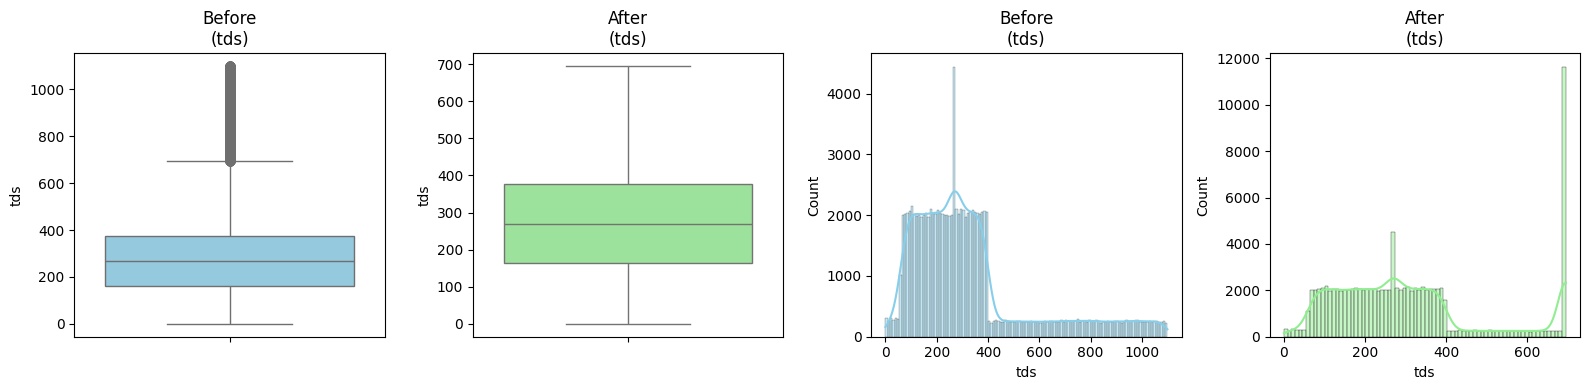

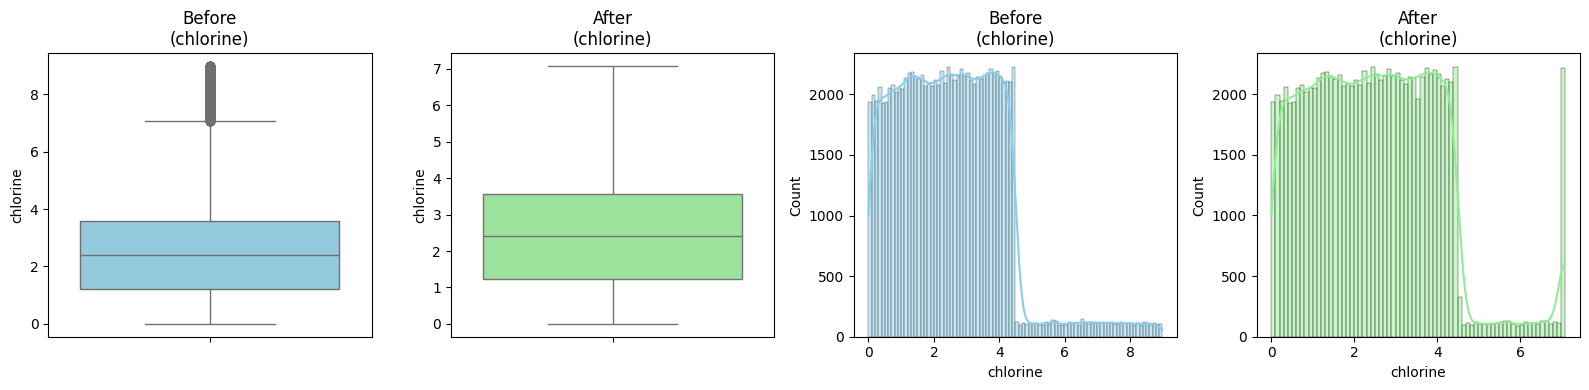

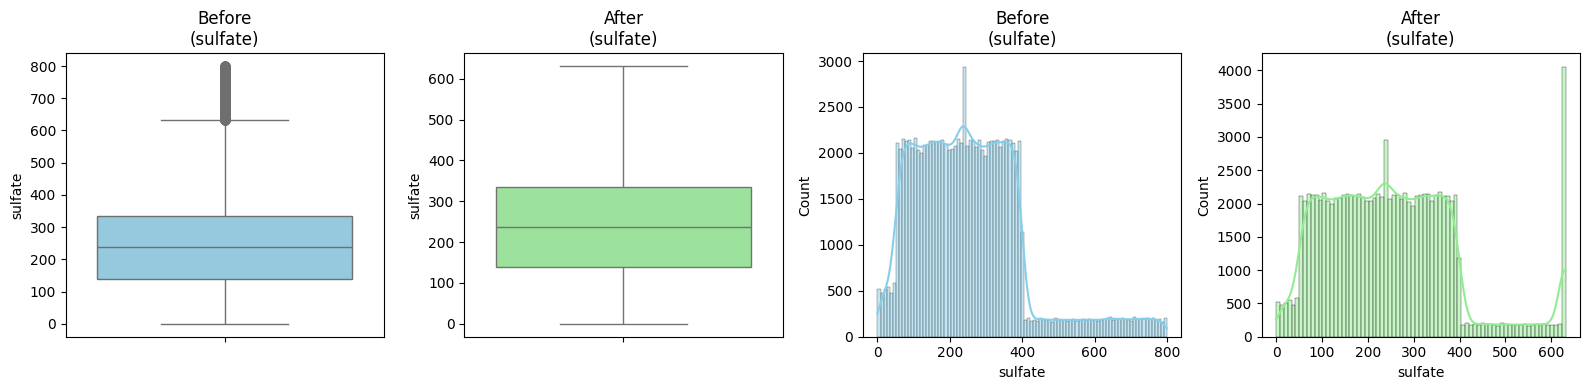

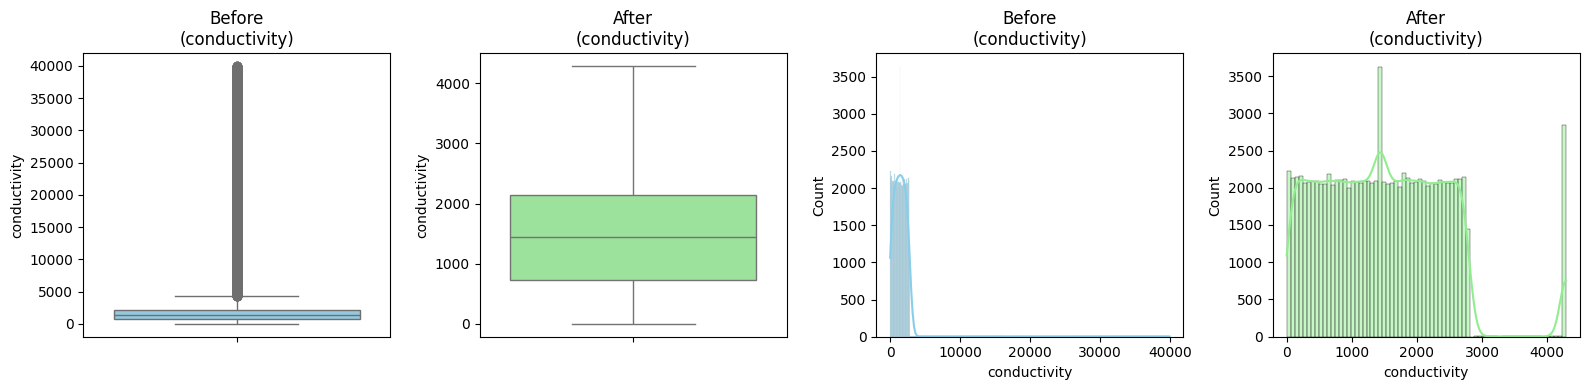

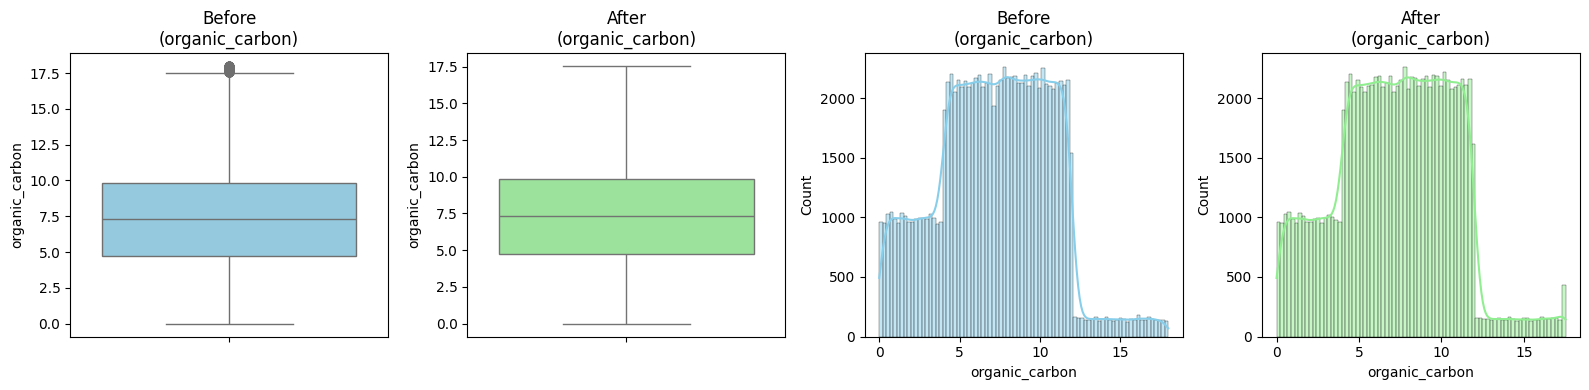

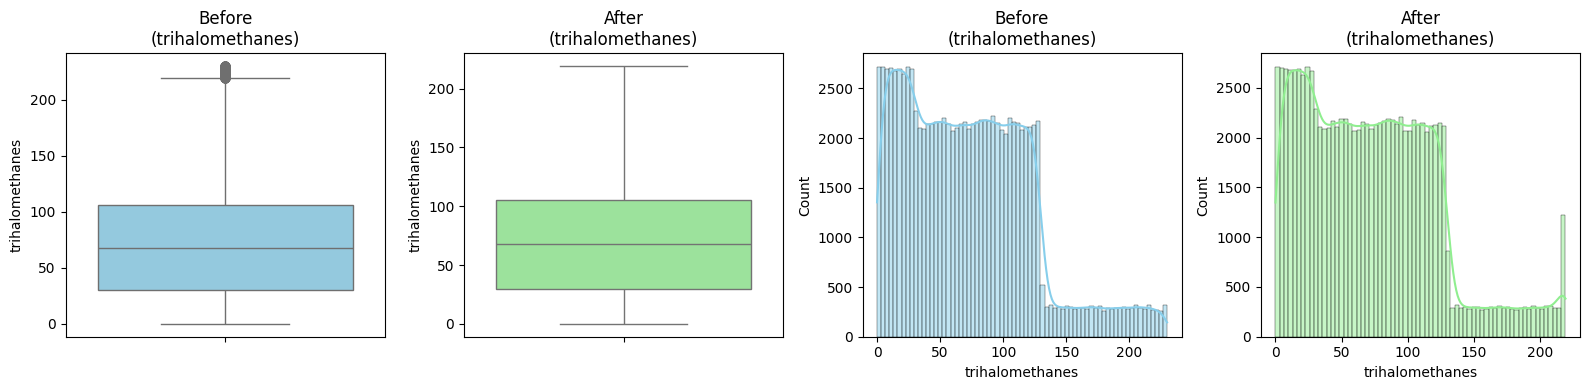

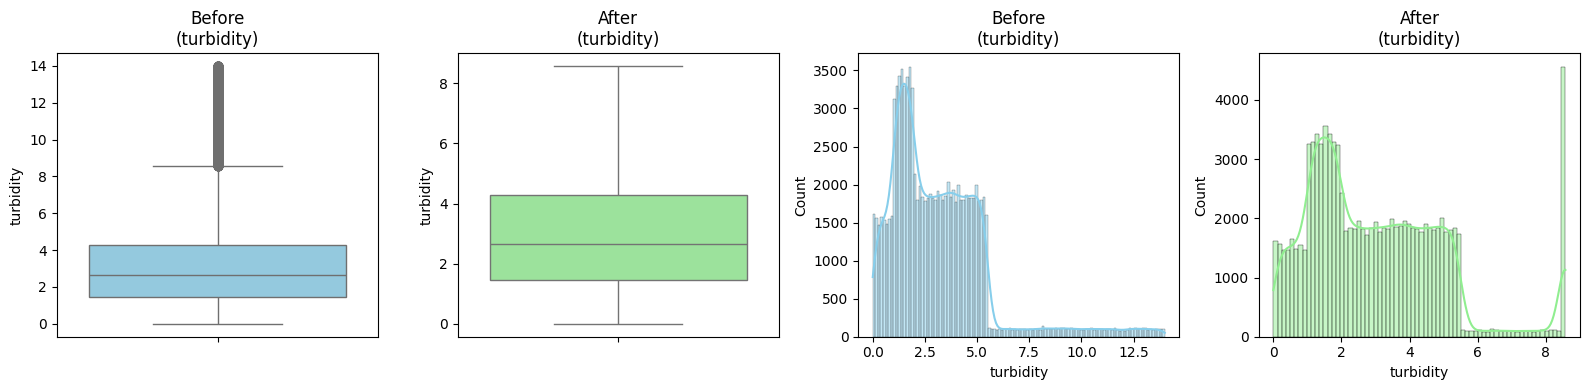

✅ Capping applied to dataset into draft.csv'


In [9]:
print("\n" + "="*80)
print("📊 Atypical Value Capping (Boxplots + Histograms)")
print("="*80 + "\n")

numeric_cols = df.select_dtypes(include=['float64']).columns

df_capped = df.copy()

for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)

for col in numeric_cols:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

    sns.boxplot(y=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f"Before\n({col})")

    sns.boxplot(y=df_capped[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"After\n({col})")

    sns.histplot(df[col], ax=axes[2], kde=True, color='skyblue')
    axes[2].set_title(f"Before\n({col})")

    sns.histplot(df_capped[col], ax=axes[3], kde=True, color='lightgreen')
    axes[3].set_title(f"After\n({col})")

    plt.tight_layout()
    plt.show()

df_capped.to_csv('draft.csv', index=False)
print("✅ Capping applied to dataset into draft.csv'")

We compare the atypical values from before they were dealt to the ones they were after the capping

----

## Counting potable and not potable instances

potability
0    92384
1     7616
Name: count, dtype: int64

Potability Class Percentages:
potability
0    92.384
1     7.616
Name: count, dtype: float64


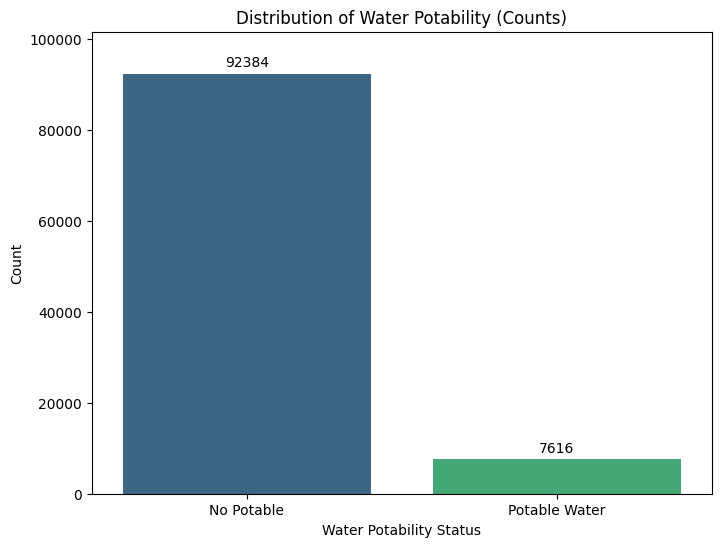


Potability Class Counts with Labels:
potability
No Potable       92384
Potable Water     7616
Name: count, dtype: int64


In [10]:
try:
    df_clean = pd.read_csv('draft.csv')

    counts = df_clean['potability'].value_counts()

    potability_labels = {
        0: 'No Potable',
        1: 'Potable Water'
    }

    counts_labeled = counts.rename(index=potability_labels)

    print(counts)

    percentages = (counts / counts.sum()) * 100
    
    print("\nPotability Class Percentages:")
    print(percentages)

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        x=counts_labeled.index,
        y=counts_labeled.values,
        hue=counts_labeled.index, 
        palette='viridis',
        legend=False
    )

    plt.title('Distribution of Water Potability (Counts)')
    plt.xlabel('Water Potability Status') 
    plt.ylabel('Count')

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    ax.set_ylim(0, counts_labeled.values.max() * 1.1)

    plt.show()

    print("\nPotability Class Counts with Labels:")
    print(counts_labeled)

except FileNotFoundError:
    print("Error: 'draft.csv' not found. Please make sure the file is in the correct directory.")
except KeyError:
    print("Error: 'potability' column not found. Please ensure the column name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

As we can see, there is a large imbalance from the two classes to make an adecuate separation.

> We have a 1:12 relation which is enourmous!

Therefore, we'll have to do some strategies to make a separation as clear as we can.

# Evaluation with the original dataset (But cleaned)

In [11]:
X = df_clean.drop(columns=['potability'])  
y = df_clean['potability']  #(0 = Not potable, 1 = Potable)
feature_names = X.columns.tolist()

### Splitting and scaling of the original dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


### Function for model evaluation

In [13]:
def get_feature_importances_for_model(model_name, model, feature_names):

    importances_data = []

    if model_name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
        if hasattr(model, 'feature_importances_') and model.feature_importances_ is not None and len(model.feature_importances_) > 0:
            importances = model.feature_importances_
            for i, importance in enumerate(importances):
                importances_data.append({'Feature': feature_names[i], 'Importance': importance})
        else:
            print(f"DEBUG: {model_name} - No feature_importances_ or empty after training.")
            return None

    elif model_name in ['LogisticRegression', 'SVM']:
        if hasattr(model, 'coef_') and model.coef_ is not None:
            coefs = model.coef_

            if len(coefs.shape) > 1:
                coefs = np.mean(np.abs(coefs), axis=0)
            else:
                coefs = np.abs(coefs)

            if len(coefs) > 0:
                for i, coef in enumerate(coefs):
                    importances_data.append({'Feature': feature_names[i], 'Importance': coef})
            else:
                print(f"DEBUG: {model_name} - Coefs array is empty.")
                return None
        else:
            print(f"DEBUG: {model_name} - No coef_ attribute after training (e.g., non-linear SVM).")
            return None

    elif model_name in ['KNN', 'MLP']:
        print(f"DEBUG: {model_name} - No direct feature importance attribute (coef_ or feature_importances_).")
        return None

    if importances_data:

        importance_df = pd.DataFrame(importances_data)
        importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
        return importance_df
    else:
        return None

### Model evaluation function

In [14]:
def evaluate_classifiers(X_train, y_train, X_test=None, y_test=None,
                         models=None, cv=None, feature_names=None):

    if models is None:
        models = {'RandomForest': RandomForestClassifier()}
    elif not isinstance(models, dict):
        models = {models.__class__.__name__: models}

    results = []
    all_feature_importances = {}
    model_iterator = tqdm(models.items(), desc="Evaluating Models")

    for name, model in model_iterator:
        print(f"\nEvaluating {name}...")


        try:
            model.fit(X_train, y_train)
            print(f"DEBUG: {name} - Model fitted successfully.")
        except Exception as e:
            print(f"ERROR: Could not fit model {name}: {e}")
            continue # Skip to the next model if fit fails

        if feature_names is not None and X_train.shape[1] > 0:
            if len(feature_names) == X_train.shape[1]:
                model_importances_df = get_feature_importances_for_model(name, model, feature_names)
                if model_importances_df is not None:
                    all_feature_importances[name] = model_importances_df
                    print(f"DEBUG: All feature importances extracted for {name}.")
                else:
                    print(f"DEBUG: No feature importances could be extracted for {name}.")
            else:
                print(f"Warning: Feature names count ({len(feature_names)}) does not match X_train columns ({X_train.shape[1]}) for {name}.")
        else:
            print(f"Warning: Cannot determine feature importances for {name}. Feature names not provided or X_train has no features.")


        if cv is not None:
            try:
                if hasattr(model, 'predict_proba'):
                    y_pred_proba_cv = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
                    fpr_cv, tpr_cv, _ = roc_curve(y_train, y_pred_proba_cv)
                    roc_auc_cv = auc(fpr_cv, tpr_cv)

                    plt.figure(figsize=(8, 6))
                    plt.plot(fpr_cv, tpr_cv, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_cv:.2f})')
                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('False Positive Rate')
                    plt.ylabel('True Positive Rate')
                    plt.title(f'Receiver Operating Characteristic (ROC) - {name} (CV/Training Set)')
                    plt.legend(loc="lower right")
                    plt.grid(True)
                    plt.show()

                else:
                    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
                    roc_auc_cv = np.nan # Not applicable if no probabilities
                    print(f"Warning: Model {name} does not have predict_proba method for CV ROC curve.")

                if not hasattr(model, 'predict_proba'): # Only if not already obtained
                     y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
                else:
                     y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)


                cv_metrics = {
                    'Model': name,
                    'Precision_0': precision_score(y_train, y_pred_cv, pos_label=0),
                    'Recall_0': recall_score(y_train, y_pred_cv, pos_label=0),
                    'F1-score_0': f1_score(y_train, y_pred_cv, pos_label=0),
                    'Precision_1': precision_score(y_train, y_pred_cv, pos_label=1),
                    'Recall_1': recall_score(y_train, y_pred_cv, pos_label=1),
                    'F1-score_1': f1_score(y_train, y_pred_cv, pos_label=1),
                    'Accuracy': accuracy_score(y_train, y_pred_cv),
                    'Macro_Avg_Precision': precision_score(y_train, y_pred_cv, average='macro'),
                    'Macro_Avg_Recall': recall_score(y_train, y_pred_cv, average='macro'),
                    'Macro_Avg_F1-score': f1_score(y_train, y_pred_cv, average='macro'),
                    'Weighted_Avg_Precision': precision_score(y_train, y_pred_cv, average='weighted'),
                    'Weighted_Avg_Recall': recall_score(y_train, y_pred_cv, average='weighted'),
                    'Weighted_Avg_F1-score': f1_score(y_train, y_pred_cv, average='weighted'),
                    'ROC_AUC': roc_auc_cv,
                    'Evaluation_Type': 'CV'
                }
                results.append(cv_metrics)
                print(f"DEBUG: CV metrics added for {name}")
            except Exception as e:
                print(f"ERROR: Could not get CV metrics for {name}: {e}")
                results.append({
                    'Model': name,
                    'Evaluation_Type': 'CV',
                    'Error': str(e)
                })

        if X_test is not None and y_test is not None:
            try:
                y_pred = model.predict(X_test)
                cm = confusion_matrix(y_test, y_pred)

                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=['Not Potable (0)', 'Potable (1)'],
                            yticklabels=['Not Potable (0)', 'Potable (1)'])
                plt.ylabel('Actual')
                plt.xlabel('Predicted')
                plt.title(f'Confusion Matrix - {name} (Test Set)')
                plt.show()

                # --- ROC Curve Plotting for Test Set ---
                if hasattr(model, 'predict_proba'):
                    y_pred_proba = model.predict_proba(X_test)[:, 1]
                    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                    roc_auc = auc(fpr, tpr)

                    plt.figure(figsize=(8, 6))
                    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('False Positive Rate')
                    plt.ylabel('True Positive Rate')
                    plt.title(f'Receiver Operating Characteristic (ROC) - {name} (Test Set)') 
                    plt.legend(loc="lower right")
                    plt.grid(True)
                    plt.show()
                else:
                    roc_auc = np.nan # Not applicable if no probabilities
                    print(f"Warning: Model {name} does not have predict_proba method for Test ROC curve.")


                test_metrics = {
                    'Model': name,
                    'Precision_0': precision_score(y_test, y_pred, pos_label=0),
                    'Recall_0': recall_score(y_test, y_pred, pos_label=0),
                    'F1-score_0': f1_score(y_test, y_pred, pos_label=0),
                    'Precision_1': precision_score(y_test, y_pred, pos_label=1),
                    'Recall_1': recall_score(y_test, y_pred, pos_label=1),
                    'F1-score_1': f1_score(y_test, y_pred, pos_label=1),
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Macro_Avg_Precision': precision_score(y_test, y_pred, average='macro'),
                    'Macro_Avg_Recall': recall_score(y_test, y_pred, average='macro'),
                    'Macro_Avg_F1-score': f1_score(y_test, y_pred, average='macro'),
                    'Weighted_Avg_Precision': precision_score(y_test, y_pred, average='weighted'),
                    'Weighted_Avg_Recall': recall_score(y_test, y_pred, average='weighted'),
                    'Weighted_Avg_F1-score': f1_score(y_test, y_pred, average='weighted'),
                    'ROC_AUC': roc_auc,
                    'Evaluation_Type': 'Test'
                }
                results.append(test_metrics)
                print(f"DEBUG: Test metrics added for {name}")
            except Exception as e:
                print(f"ERROR: Could not get Test metrics for {name}: {e}")
                results.append({
                    'Model': name,
                    'Evaluation_Type': 'Test',
                    'Error': str(e)
                })

    columns = [
        'Model', 'Precision_0', 'Recall_0', 'F1-score_0',
        'Precision_1', 'Recall_1', 'F1-score_1', 'Accuracy',
        'Macro_Avg_Precision', 'Macro_Avg_Recall', 'Macro_Avg_F1-score',
        'Weighted_Avg_Precision', 'Weighted_Avg_Recall', 'Weighted_Avg_F1-score',
        'ROC_AUC',
        'Evaluation_Type'
    ]

    print("Dataframe with results completed. \n")

    return pd.DataFrame(results)[columns] if results else pd.DataFrame(columns=columns), \
           all_feature_importances


This is the core of the evaluation of models.

We take in account the precision, accuracy, f1 score and roc auc score for every class.

Along with an aditional part of feature importances.

----

### Models selection

In [15]:
if debugging:
    models = {
        'LogisticRegression': LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'),
        'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(random_state=42, class_weight='balanced', probability=True), 
        'KNN': KNeighborsClassifier(),
        'MLP': MLPClassifier(random_state=42, max_iter=300),
        'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])))
    }
else:
    models = {
        'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
}

### Model evaluation

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


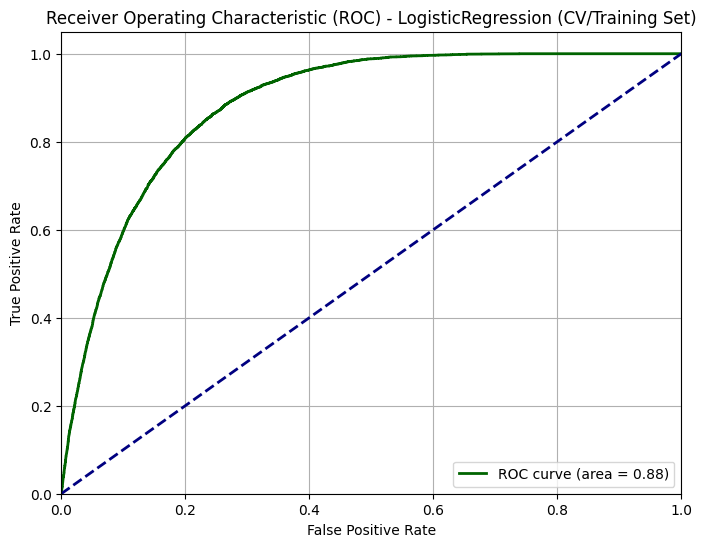

DEBUG: CV metrics added for LogisticRegression


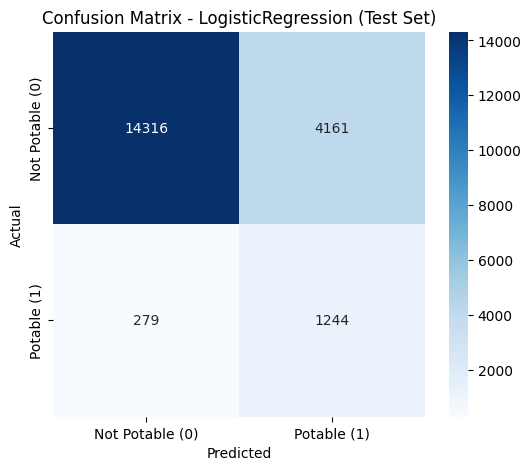

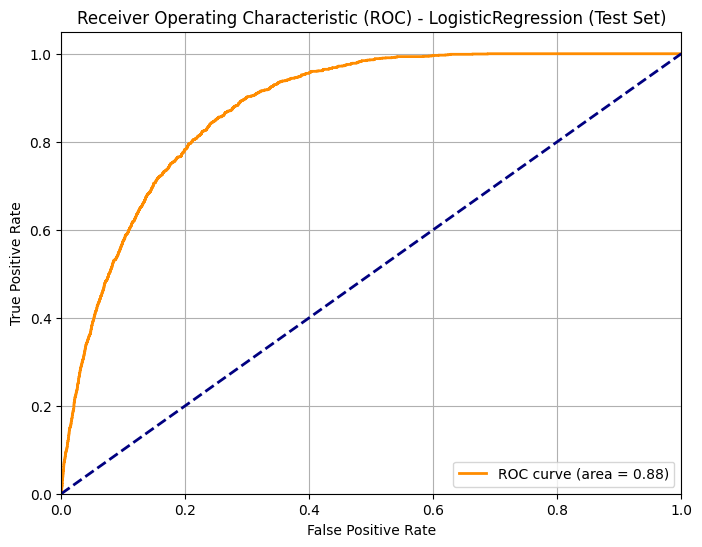

Evaluating Models:  14%|█▍        | 1/7 [00:01<00:07,  1.25s/it]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


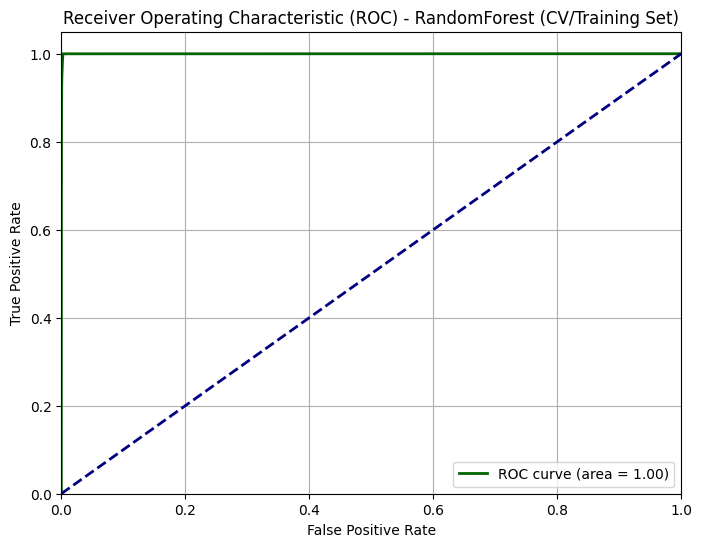

DEBUG: CV metrics added for RandomForest


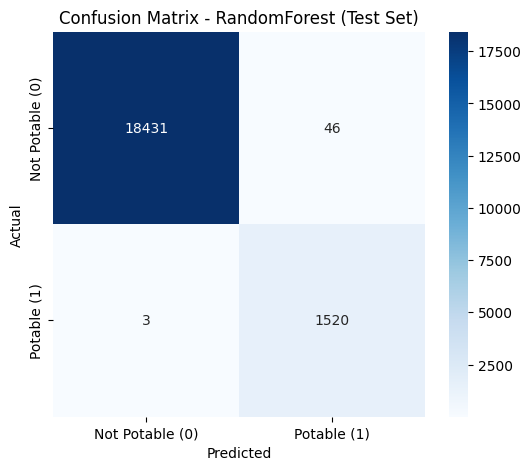

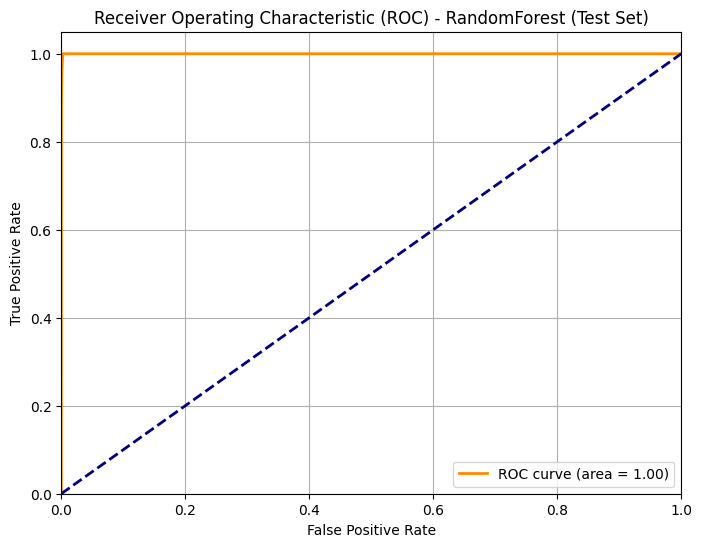

Evaluating Models:  29%|██▊       | 2/7 [01:35<04:38, 55.75s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


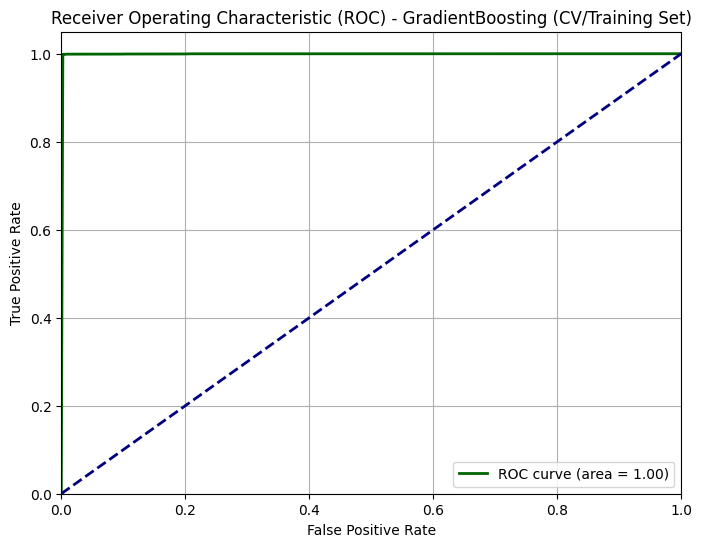

DEBUG: CV metrics added for GradientBoosting


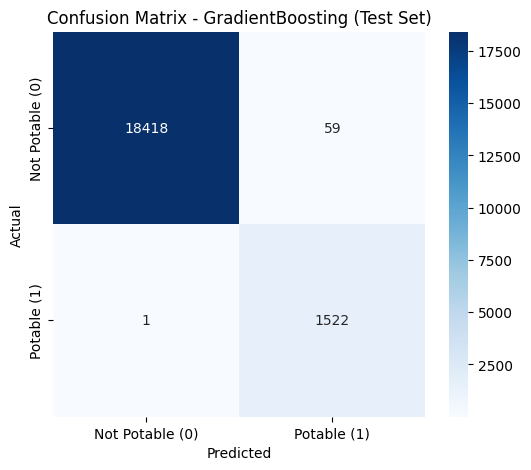

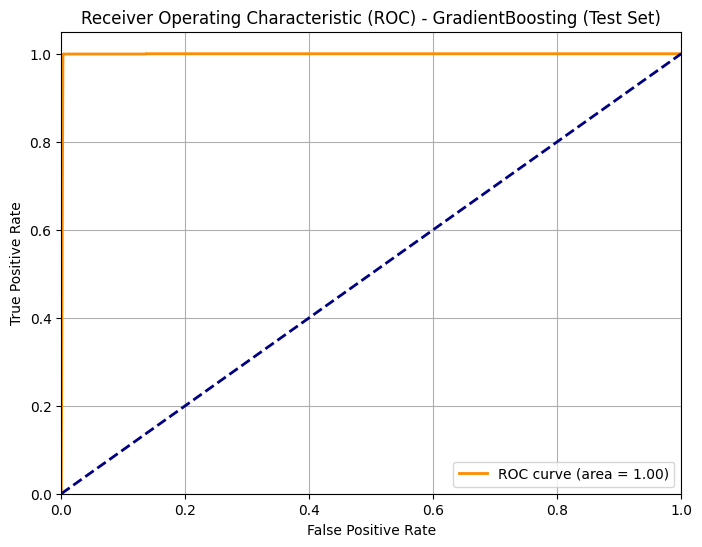

Evaluating Models:  43%|████▎     | 3/7 [06:04<10:12, 153.23s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


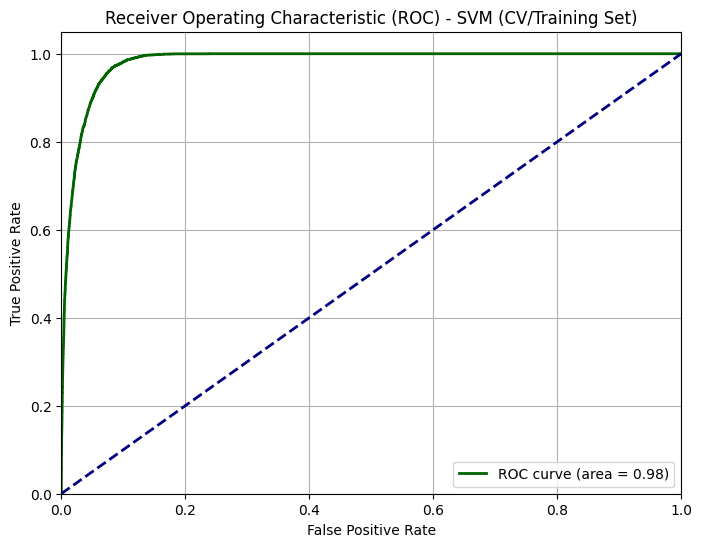

DEBUG: CV metrics added for SVM


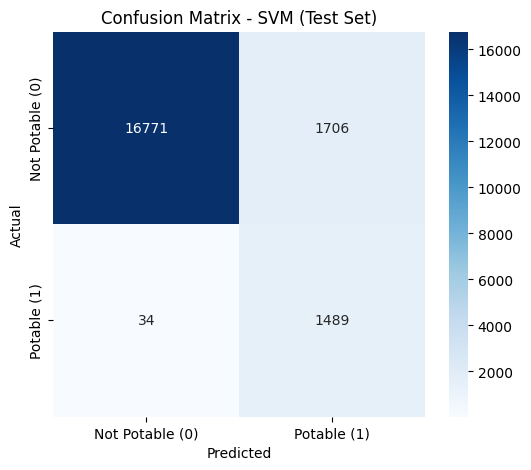

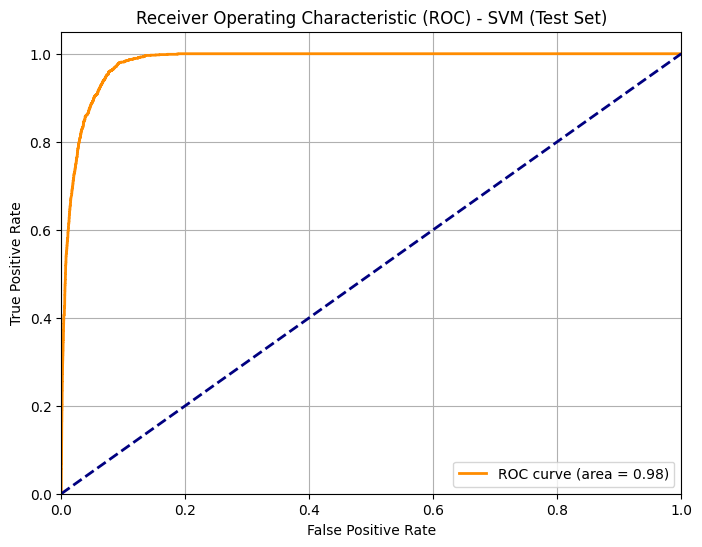

Evaluating Models:  57%|█████▋    | 4/7 [1:04:45<1:14:08, 1482.90s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


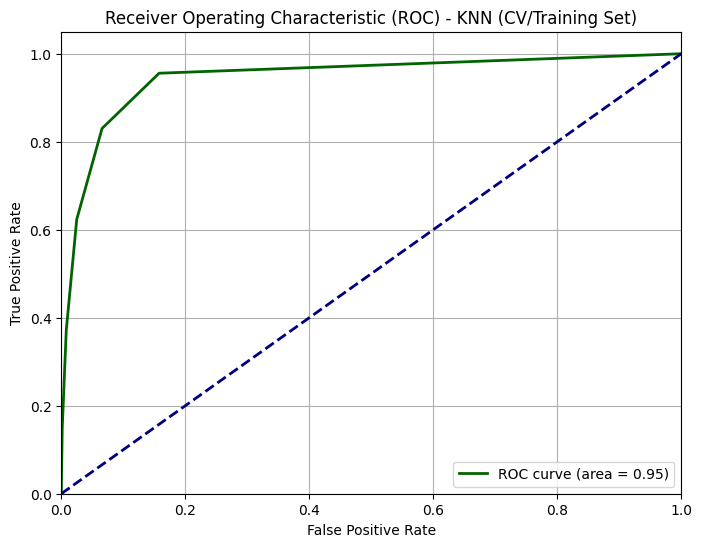

DEBUG: CV metrics added for KNN


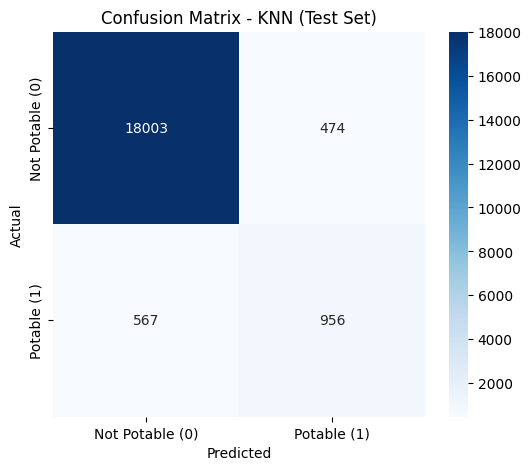

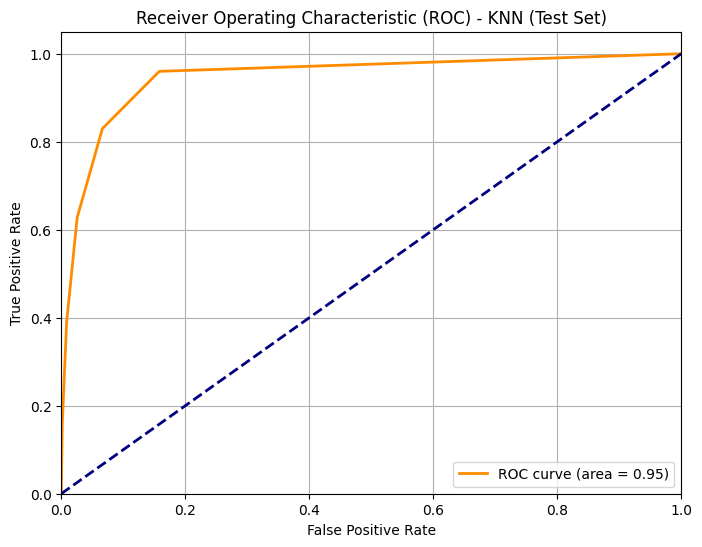

Evaluating Models:  71%|███████▏  | 5/7 [1:05:19<32:00, 960.46s/it]   

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

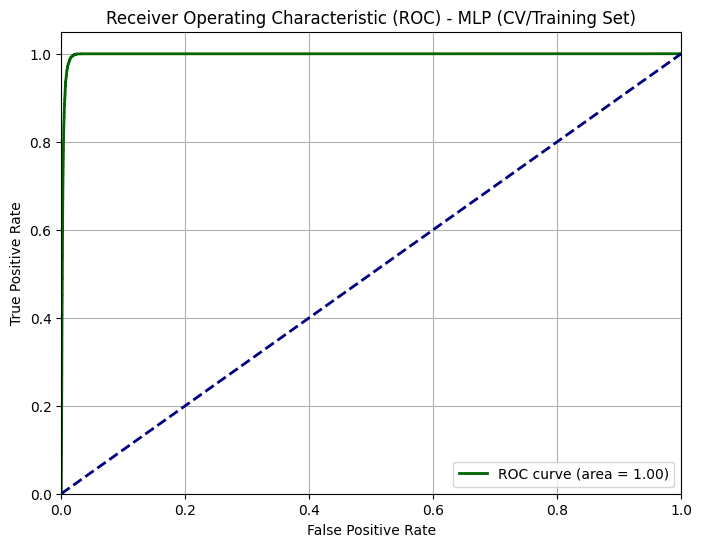

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


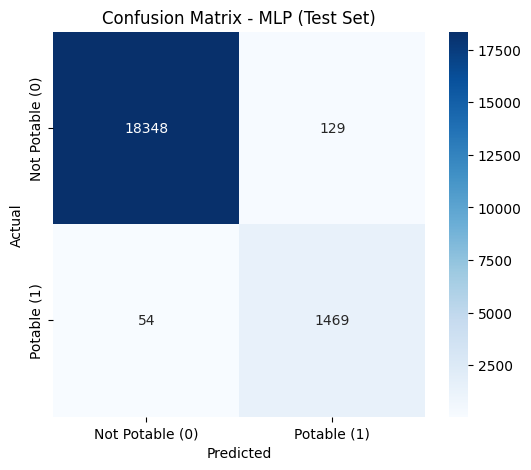

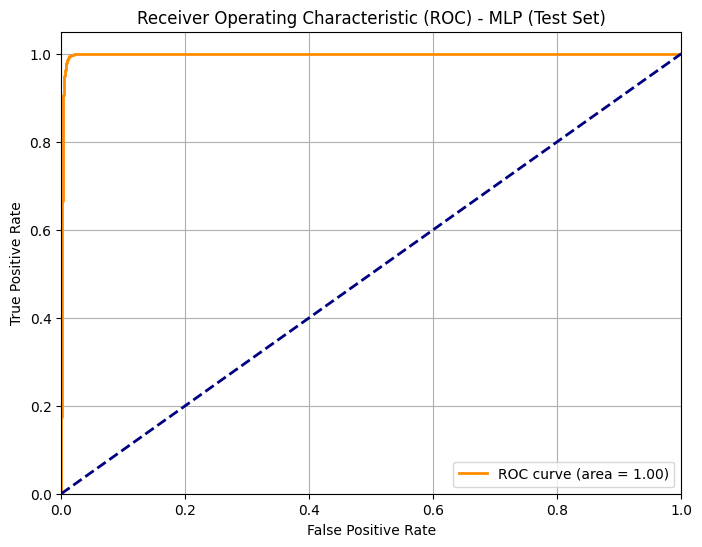

Evaluating Models:  86%|████████▌ | 6/7 [1:11:57<12:49, 769.04s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


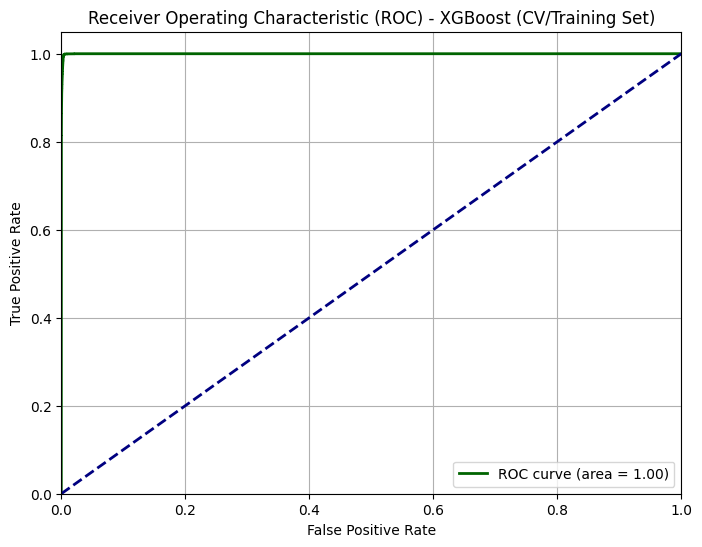

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


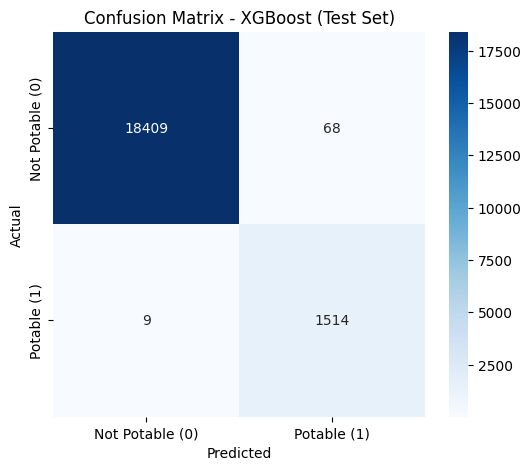

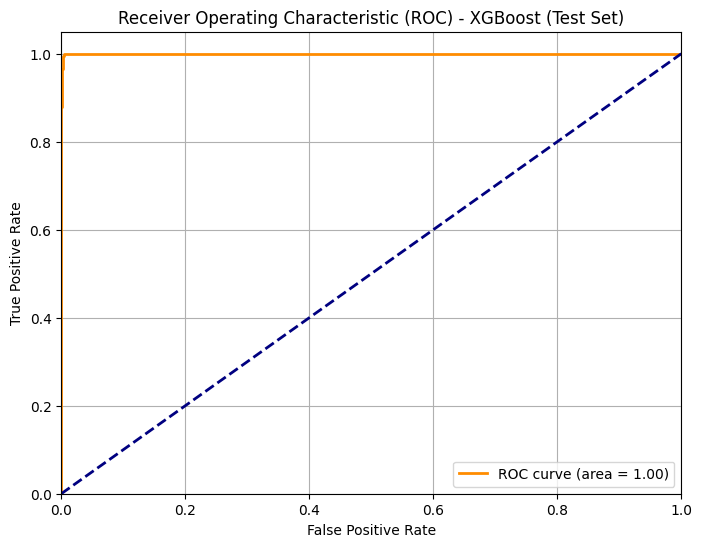

Evaluating Models: 100%|██████████| 7/7 [1:12:00<00:00, 617.19s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [16]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_scaled, y_train,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

Debugging Running time (All):  60 mins 12 scnds

No Debugging Running time (RF): 1 min 35 scnds

----

### Comparison between CV and Test sets

In [17]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.982661  0.779858    0.869592     0.237796   
2         RandomForest     0.999742  0.997537    0.998639     0.970908   
4     GradientBoosting     0.999810  0.997037    0.998422     0.965227   
6                  SVM     0.997814  0.907911    0.950742     0.466280   
8                  KNN     0.969124  0.975104    0.972105     0.673585   
10                 MLP     0.996086  0.991611    0.993843     0.903502   
12             XGBoost     0.999471  0.996671    0.998069     0.960952   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.833087    0.369984  0.783913             0.610229          0.806473   
2   0.996882    0.983723  0.997487             0.985325          0.997210   
4   0.997702    0.981196  0.997088             0.982519          0.997370   
6   0.975874    0.631043  0.913088             0.732047    

### Feature importance

In [18]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.820842
trihalomethanes    1.453976
            tds    1.338284
       hardness    0.961886
        sulfate    0.957639
 organic_carbon    0.921146
      turbidity    0.736588
       chlorine    0.723139
             ph    0.023782

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.218170
            tds    0.183549
trihalomethanes    0.145911
       hardness    0.115132
 organic_carbon    0.109606
        sulfate    0.089065
       chlorine    0.055305
      turbidity    0.046543
             ph    0.036717

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.254610
            tds    0.199659
trihalomethanes    0.170282
       hardness    0.092538
 organic_carbon    0.085982
        sulfate    0.079573
       chlorine    0.041334
      turbidity    0.039412
 

# Reduction training

## 50% of training size

#### Splitting, scaling and data leakage treatment 

In [19]:
X_train_half, _, y_train_half, _ = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42, stratify=y_train
)

train_indices = set(X_train_half.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_half_scaled = scaler.fit_transform(X_train_half)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


#### Classifier Evaluation

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


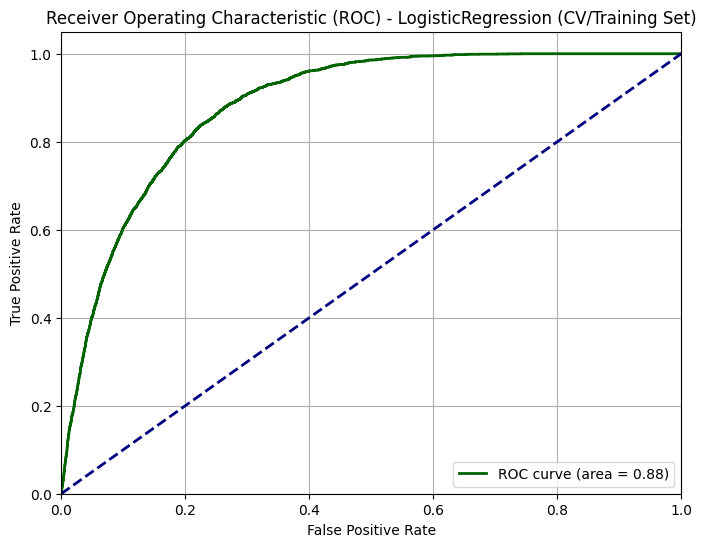

DEBUG: CV metrics added for LogisticRegression


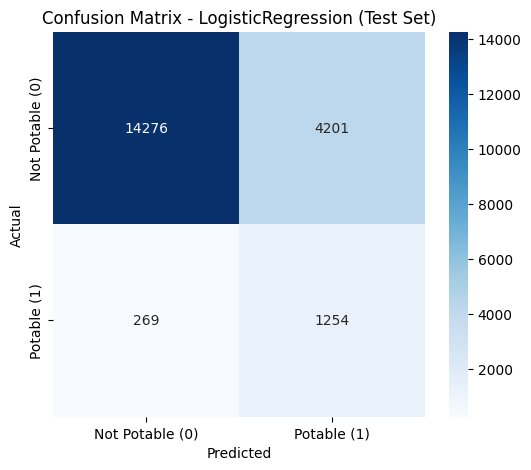

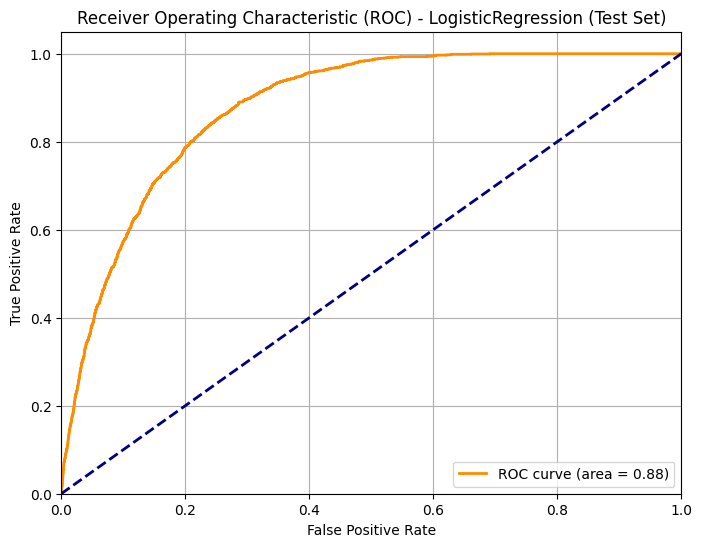

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:03,  1.52it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


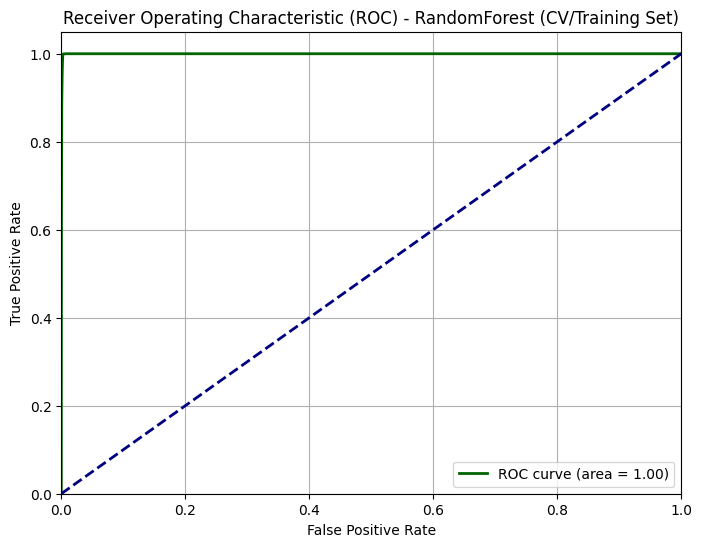

DEBUG: CV metrics added for RandomForest


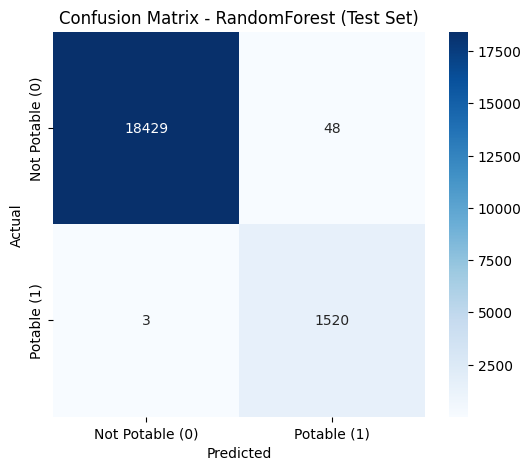

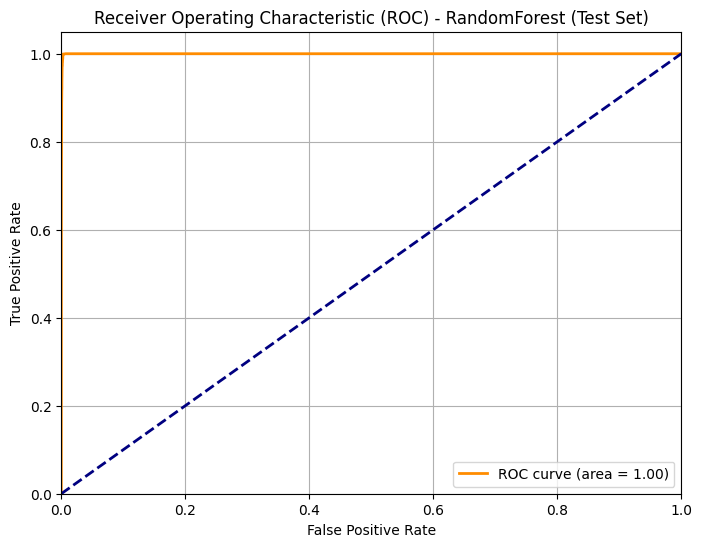

Evaluating Models:  29%|██▊       | 2/7 [00:41<02:02, 24.55s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


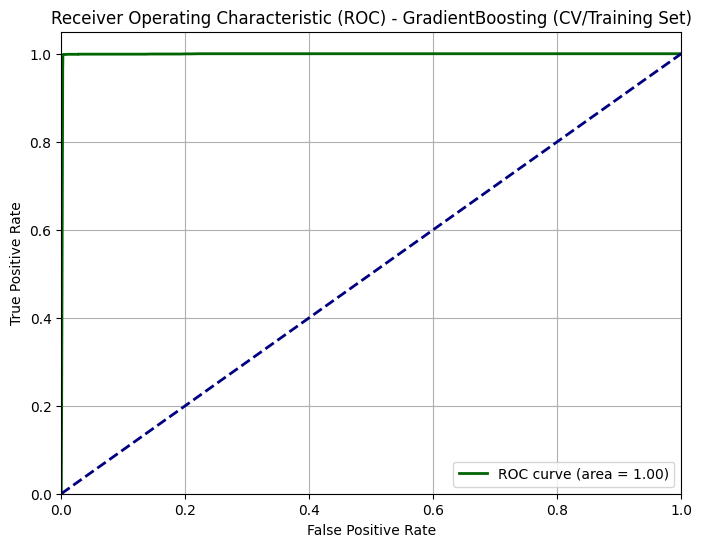

DEBUG: CV metrics added for GradientBoosting


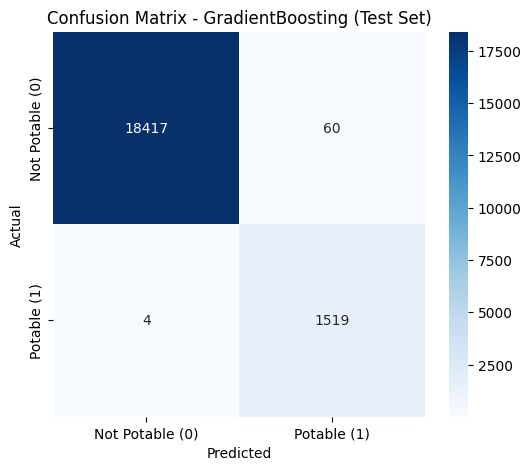

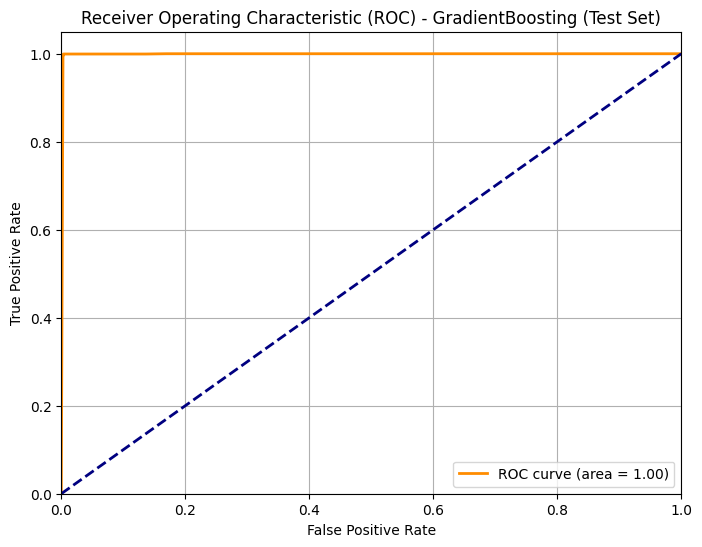

Evaluating Models:  43%|████▎     | 3/7 [02:09<03:32, 53.15s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


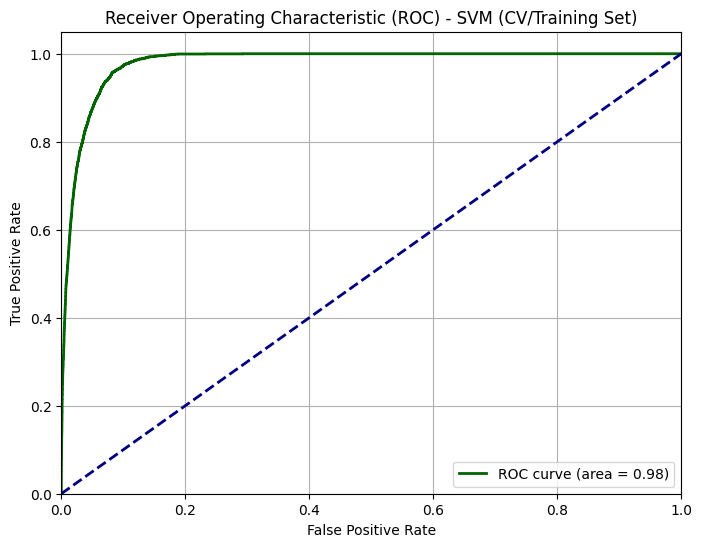

DEBUG: CV metrics added for SVM


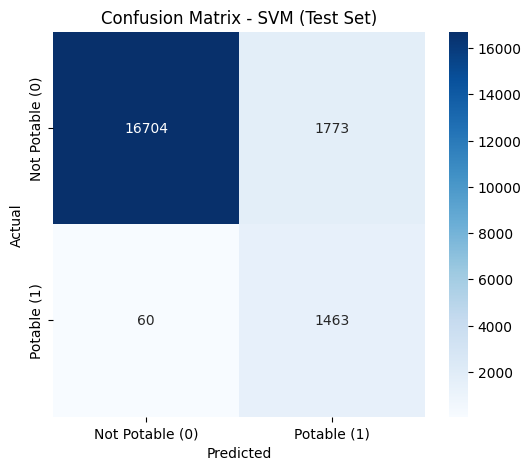

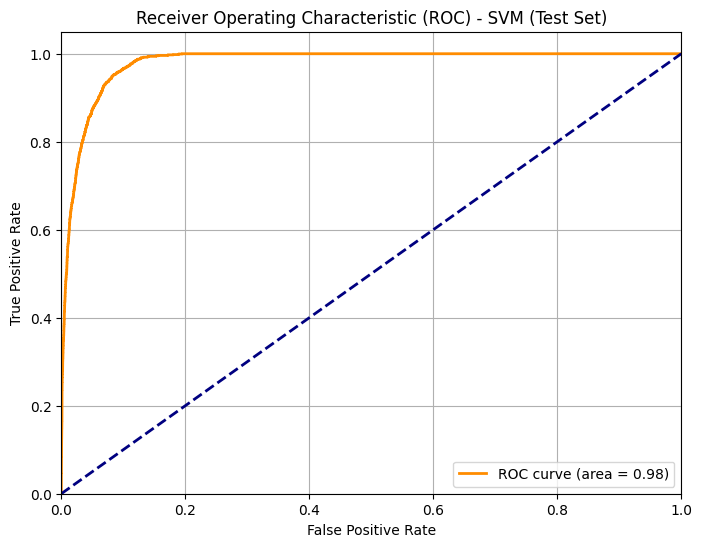

Evaluating Models:  57%|█████▋    | 4/7 [10:20<11:18, 226.03s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


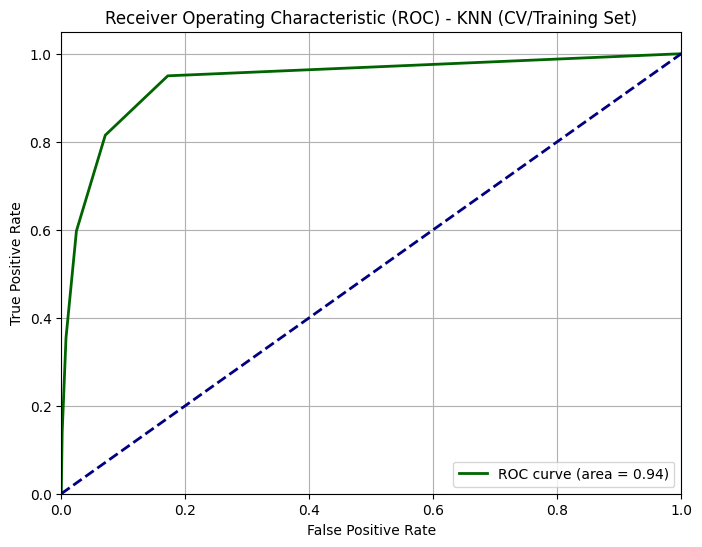

DEBUG: CV metrics added for KNN


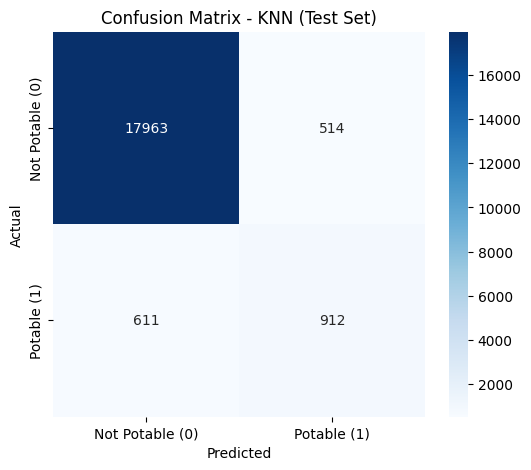

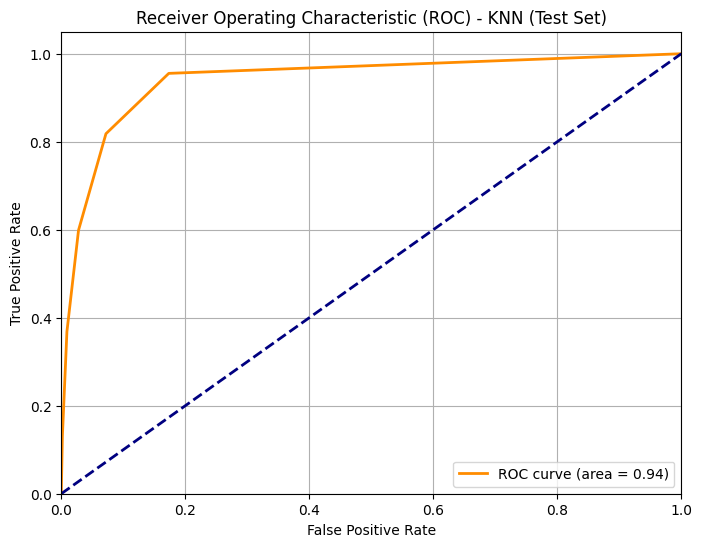

Evaluating Models:  71%|███████▏  | 5/7 [10:35<05:00, 150.08s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

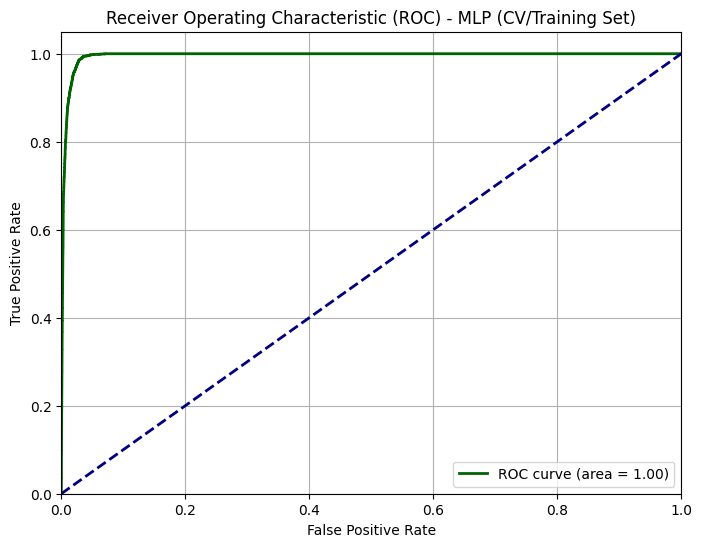

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


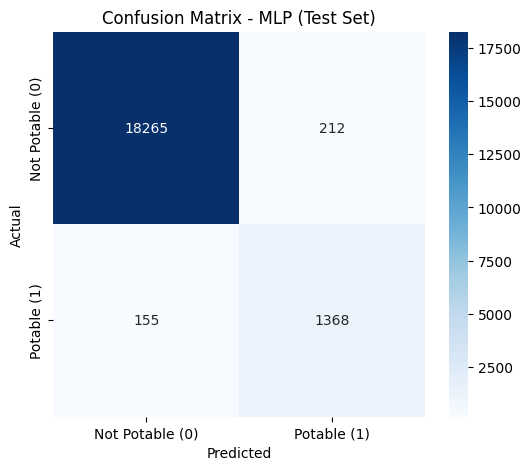

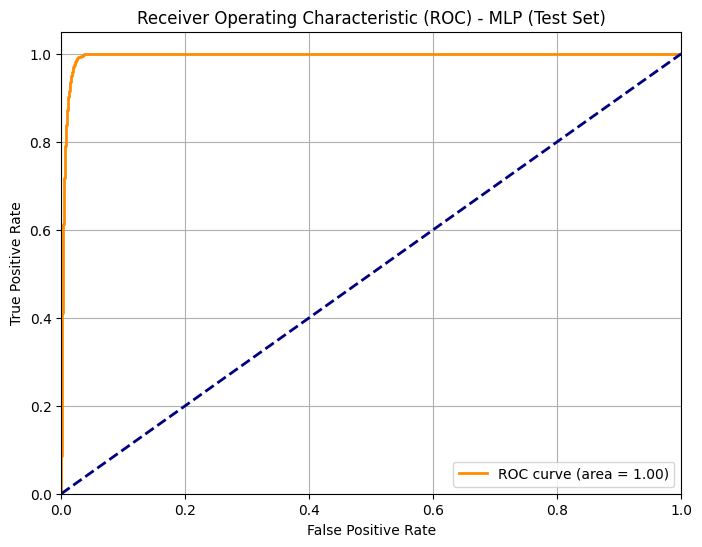

Evaluating Models:  86%|████████▌ | 6/7 [14:29<02:58, 178.66s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


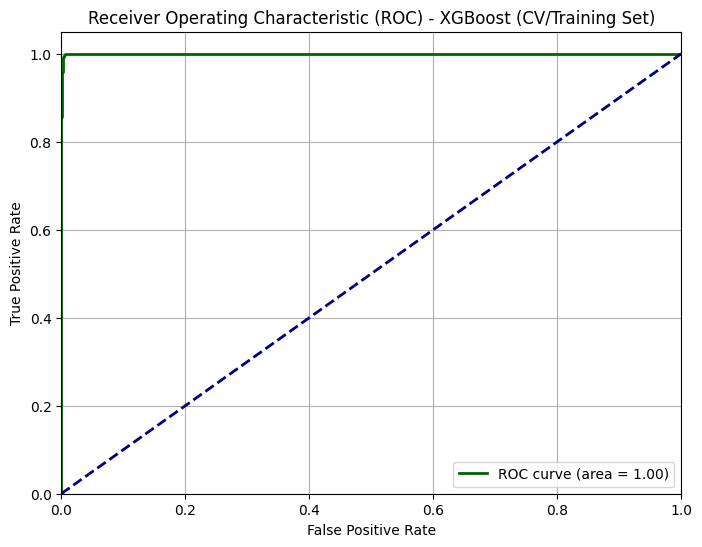

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


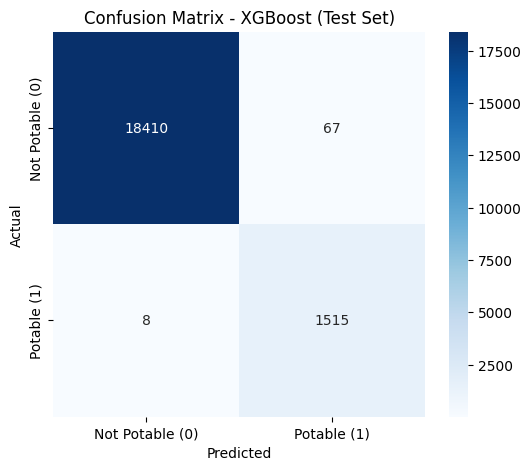

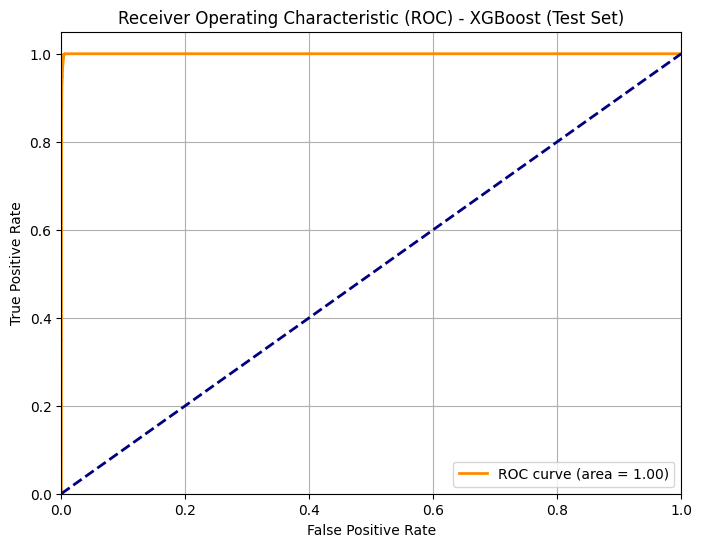

Evaluating Models: 100%|██████████| 7/7 [14:31<00:00, 124.55s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [20]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_half_scaled, y_train_half,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

#### CV and Test data comparison

In [21]:
print("\n--- Cross Validation ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Test Data ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Cross Validation ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.982455  0.778860    0.868891     0.236547   
2         RandomForest     0.999702  0.997700    0.998700     0.972756   
4     GradientBoosting     0.999783  0.997186    0.998483     0.966900   
6                  SVM     0.996994  0.906397    0.949539     0.459869   
8                  KNN     0.967085  0.975564    0.971306     0.668259   
10                 MLP     0.990464  0.989311    0.989887     0.872127   
12             XGBoost     0.999267  0.996509    0.997886     0.959022   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.831254    0.368291  0.782850             0.609501          0.805057   
2   0.996389    0.984431  0.997600             0.986229          0.997044   
4   0.997374    0.981900  0.997200             0.983342          0.997280   
6   0.966842    0.623280  0.911000             0.728431          0.936619

#### Feature importance ranking 

In [22]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.755507
trihalomethanes    1.430064
            tds    1.364235
       hardness    0.957956
 organic_carbon    0.948138
        sulfate    0.885671
      turbidity    0.766524
       chlorine    0.702644
             ph    0.035941

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.214201
            tds    0.182827
trihalomethanes    0.146486
       hardness    0.119562
 organic_carbon    0.109170
        sulfate    0.088690
       chlorine    0.055148
      turbidity    0.046391
             ph    0.037525

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.240335
            tds    0.191825
trihalomethanes    0.174822
       hardness    0.102499
        sulfate    0.085991
 organic_carbon    0.083858
       chlorine    0.042706
      turbidity    0.039033
 

## 25% of training size //Deprecated

In [23]:
X_train_half2, _, y_train_half2, _ = train_test_split(
    X_train, y_train, test_size=0.75, random_state=42, stratify=y_train
)

train_indices = set(X_train_half2.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_half_scaled2 = scaler.fit_transform(X_train_half2)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


### Model evaluation

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


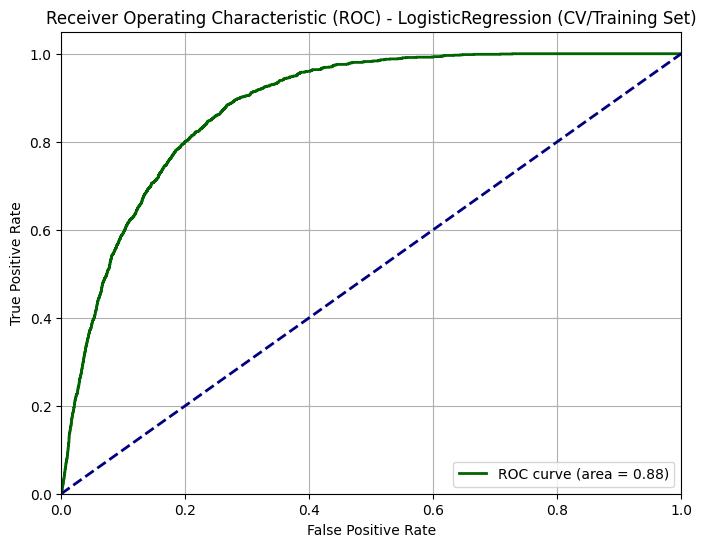

DEBUG: CV metrics added for LogisticRegression


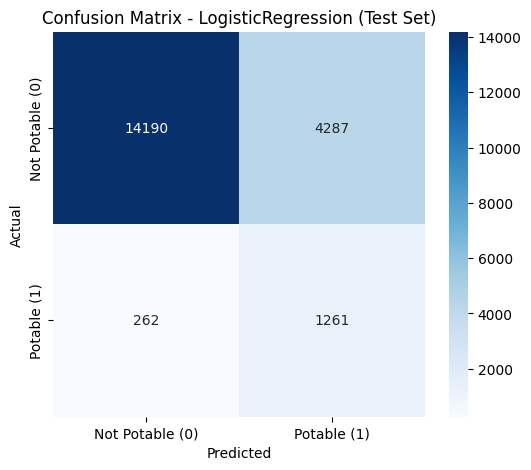

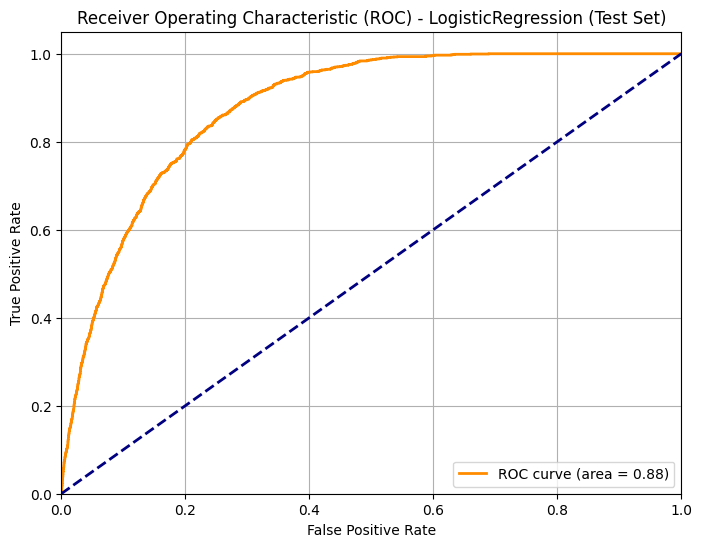

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:03,  1.63it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


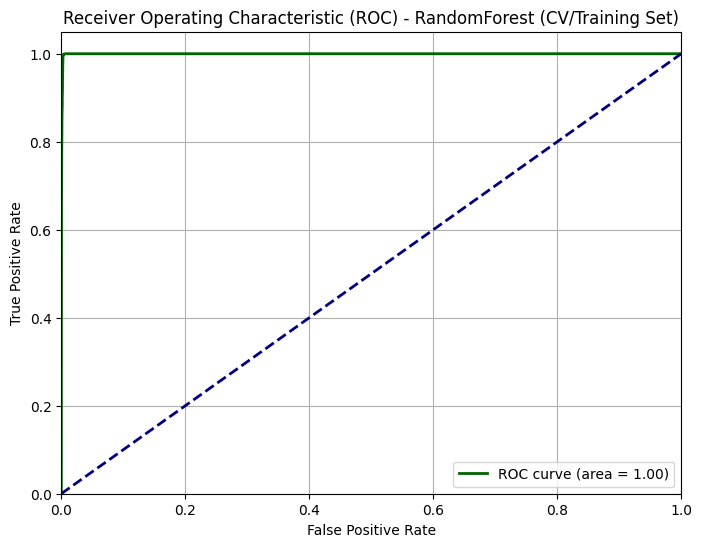

DEBUG: CV metrics added for RandomForest


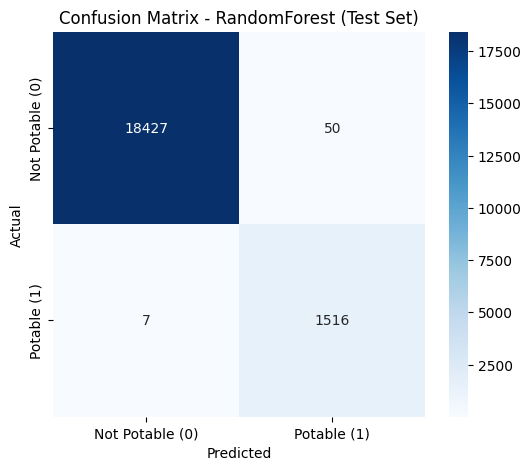

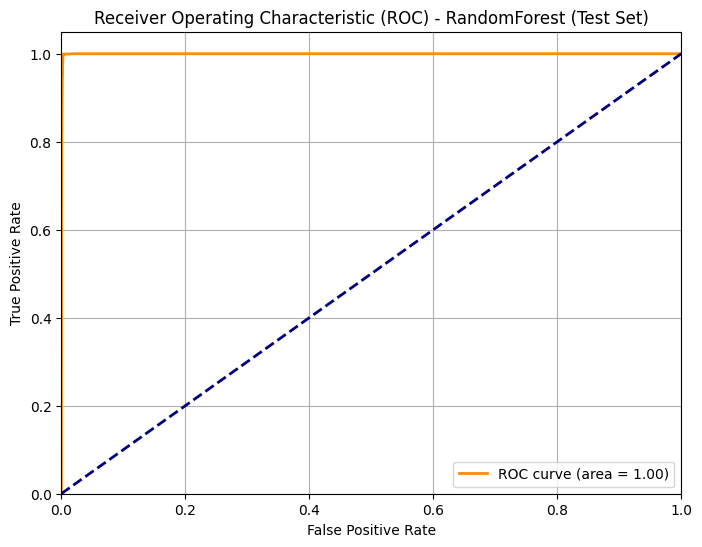

Evaluating Models:  29%|██▊       | 2/7 [00:26<01:17, 15.49s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


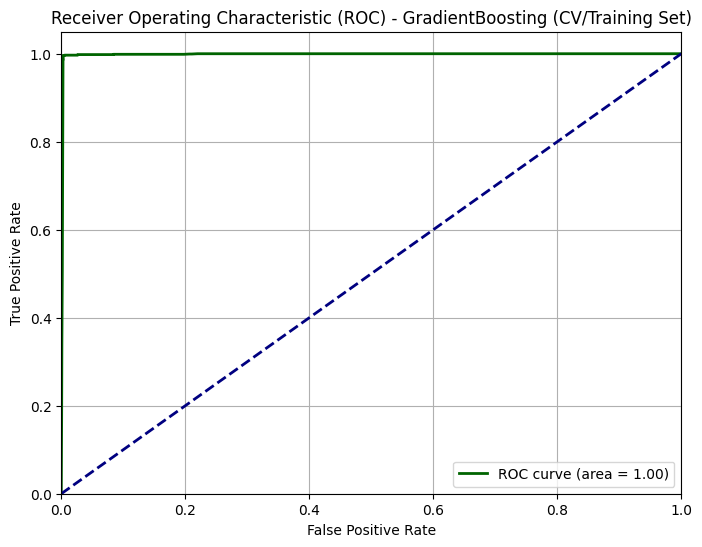

DEBUG: CV metrics added for GradientBoosting


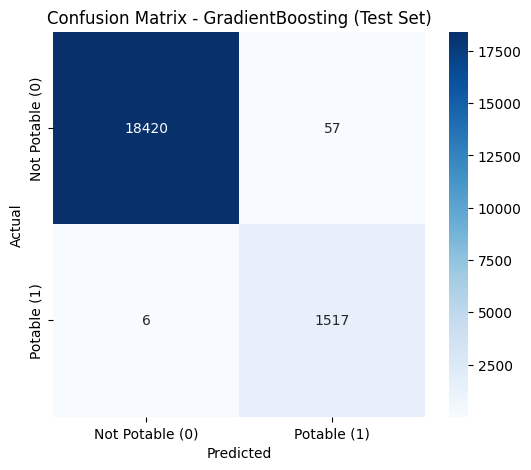

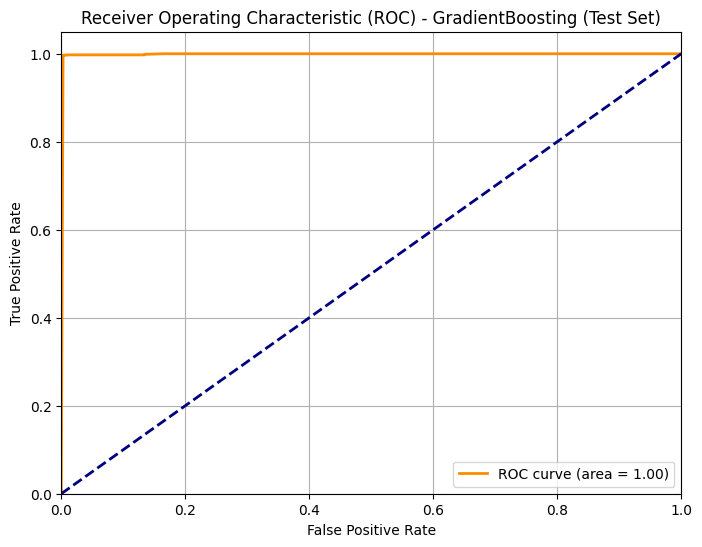

Evaluating Models:  43%|████▎     | 3/7 [19:54<36:07, 541.95s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


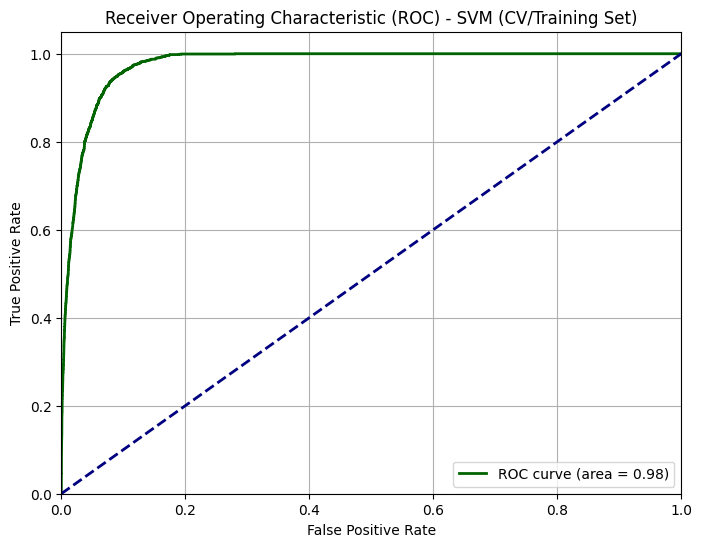

DEBUG: CV metrics added for SVM


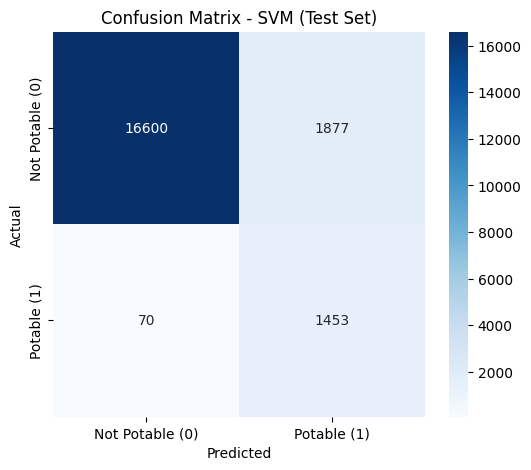

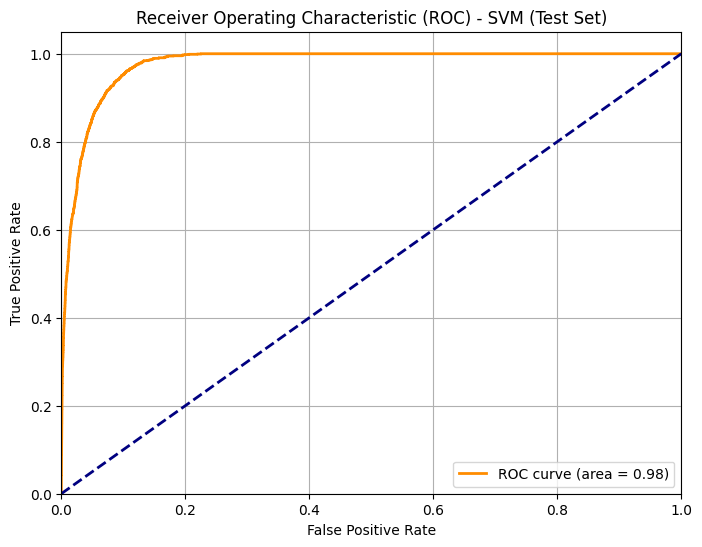

Evaluating Models:  57%|█████▋    | 4/7 [22:09<19:03, 381.22s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


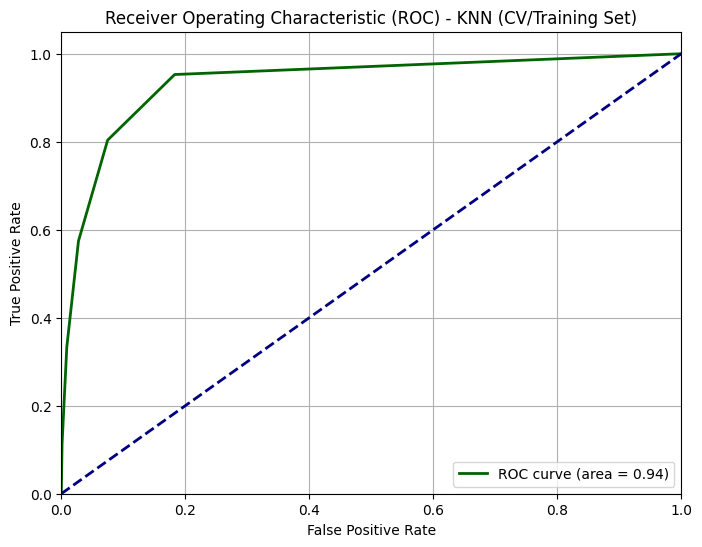

DEBUG: CV metrics added for KNN


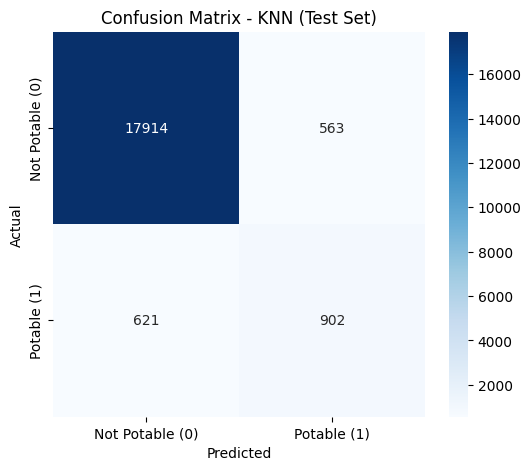

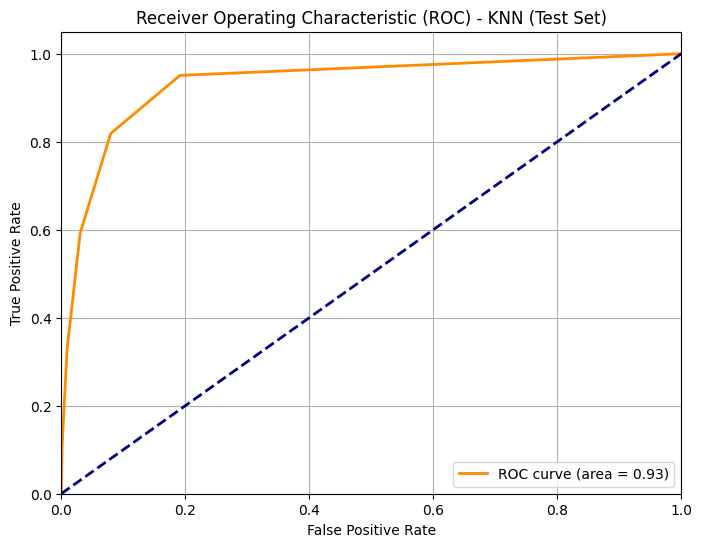

Evaluating Models:  71%|███████▏  | 5/7 [22:19<08:14, 247.31s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

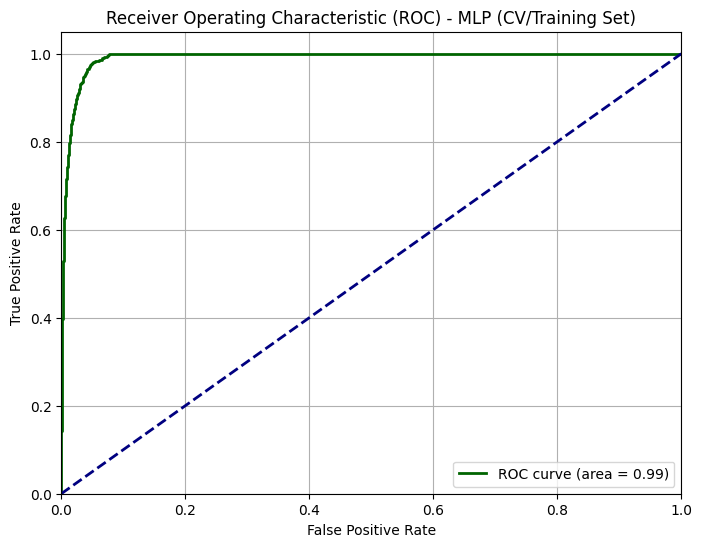

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


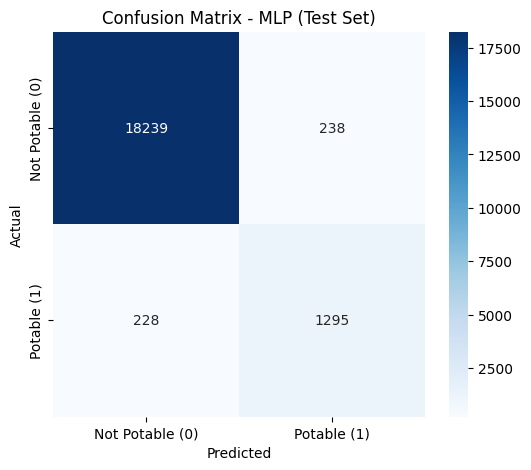

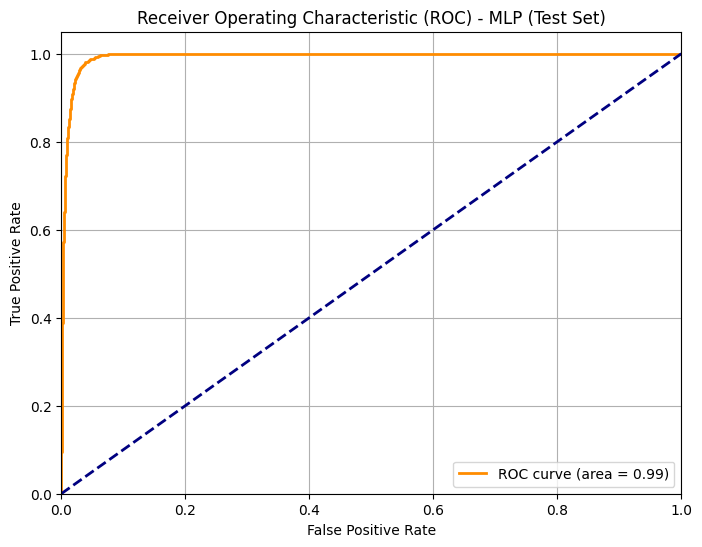

Evaluating Models:  86%|████████▌ | 6/7 [24:13<03:21, 201.85s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...
DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


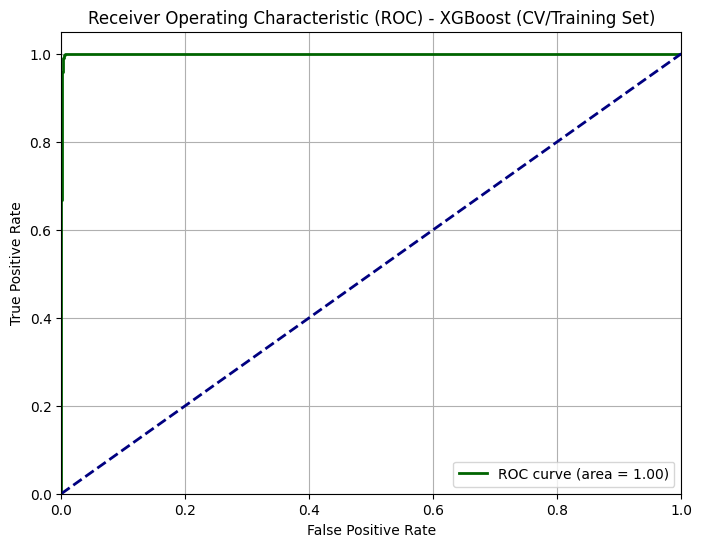

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


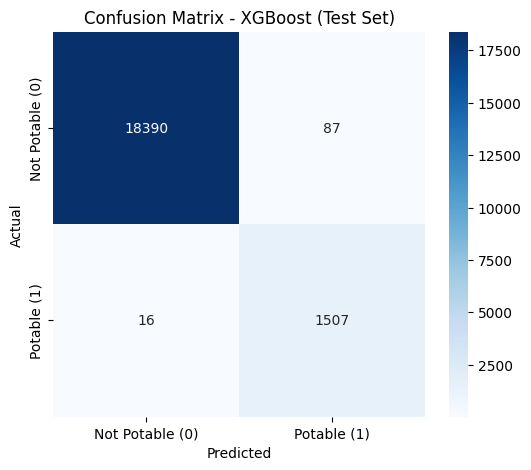

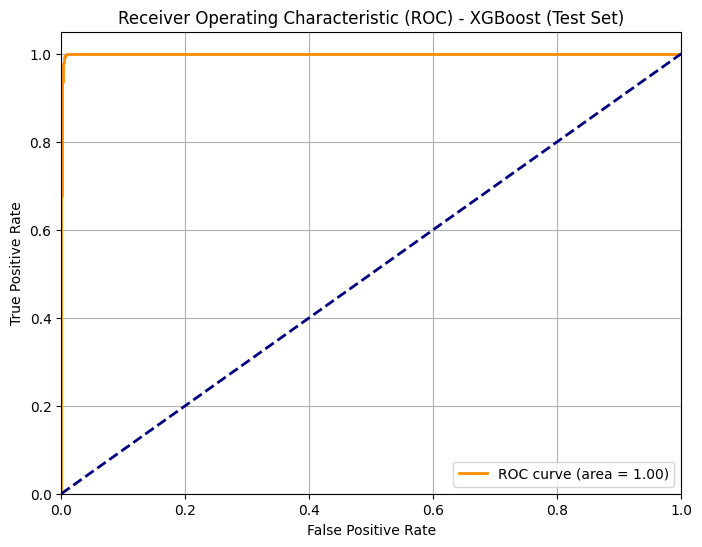

Evaluating Models: 100%|██████████| 7/7 [24:14<00:00, 207.84s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [24]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_half_scaled2, y_train_half2,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

### Comparación de CV y Testing

In [25]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.981989  0.776046    0.866955     0.233420   
2         RandomForest     0.999620  0.997294    0.998456     0.968072   
4     GradientBoosting     0.999620  0.996807    0.998211     0.962540   
6                  SVM     0.995943  0.903393    0.947413     0.449074   
8                  KNN     0.965184  0.972236    0.968697     0.630403   
10                 MLP     0.984166  0.985658    0.984912     0.822742   
12             XGBoost     0.999294  0.996212    0.997750     0.955696   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.827315    0.364109   0.77995             0.607704          0.801680   
2   0.995404    0.981547   0.99715             0.983846          0.996349   
4   0.995404    0.978696   0.99670             0.981080          0.996105   
6   0.955351    0.610959   0.90735             0.722508    

In [26]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.756681
trihalomethanes    1.423243
            tds    1.311713
       hardness    0.970622
 organic_carbon    0.923044
        sulfate    0.859060
      turbidity    0.734107
       chlorine    0.717942
             ph    0.071669

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.213385
            tds    0.184896
trihalomethanes    0.146740
       hardness    0.118767
 organic_carbon    0.110637
        sulfate    0.088857
       chlorine    0.054409
      turbidity    0.046875
             ph    0.035435

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.247145
            tds    0.189163
trihalomethanes    0.170592
 organic_carbon    0.102321
       hardness    0.095954
        sulfate    0.079938
       chlorine    0.041492
      turbidity    0.037620
 

## 10% of training size

In [27]:
X_train_half3, _, y_train_half3, _ = train_test_split(
    X_train, y_train, test_size=0.9, random_state=42, stratify=y_train
)

train_indices = set(X_train_half3.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_half_scaled3 = scaler.fit_transform(X_train_half3)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


### Model Evaluations

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


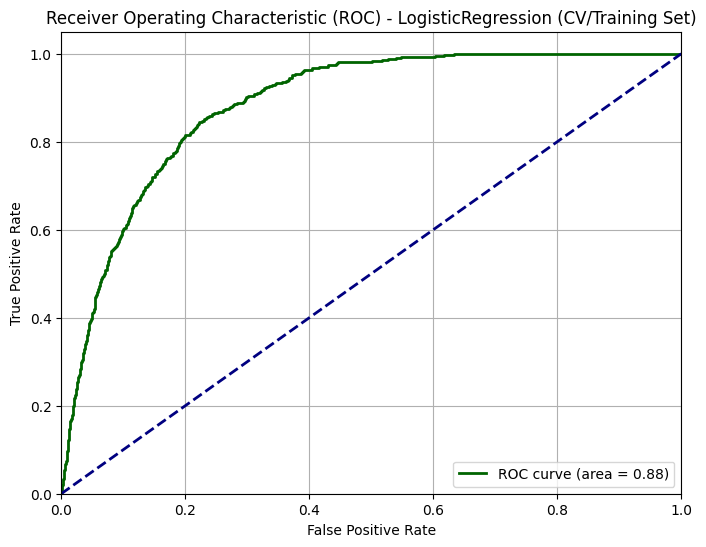

DEBUG: CV metrics added for LogisticRegression


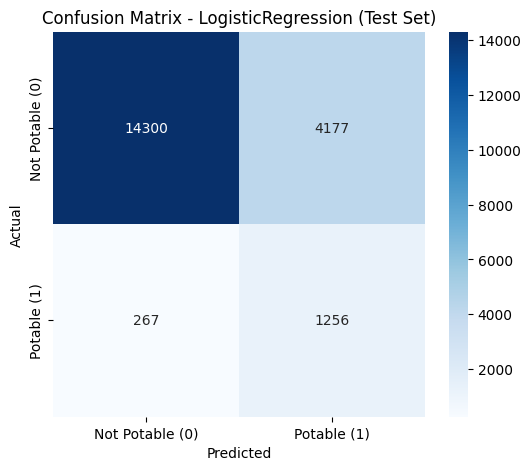

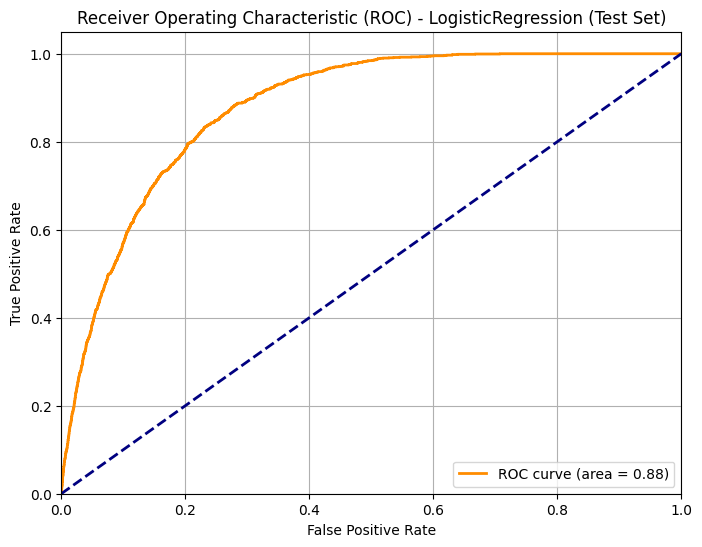

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:02,  2.21it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


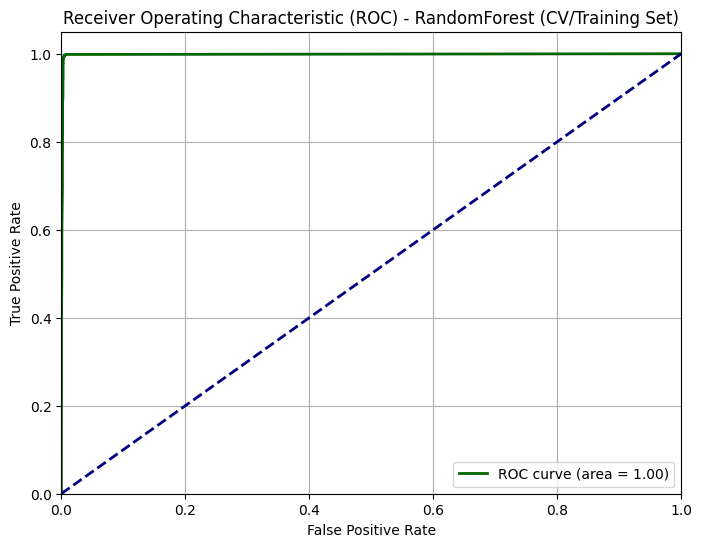

DEBUG: CV metrics added for RandomForest


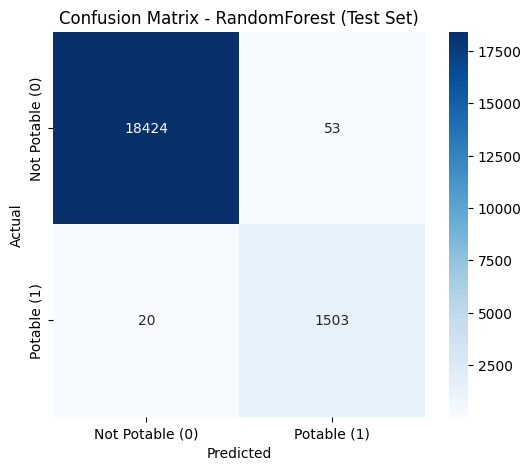

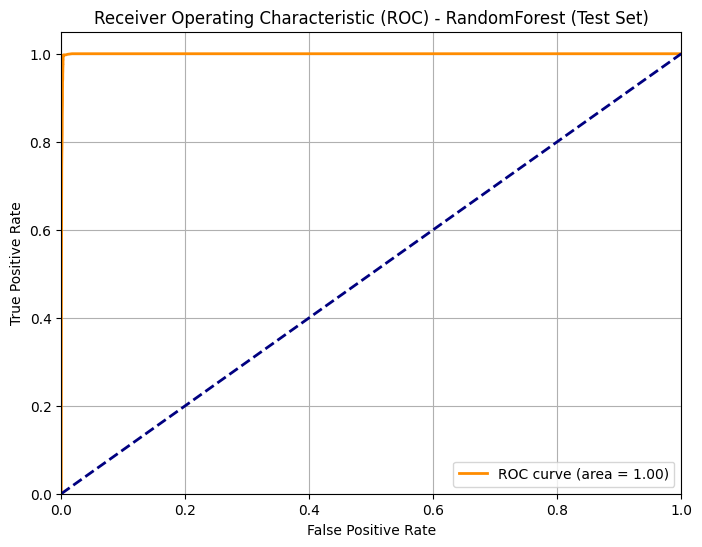

Evaluating Models:  29%|██▊       | 2/7 [00:09<00:28,  5.75s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


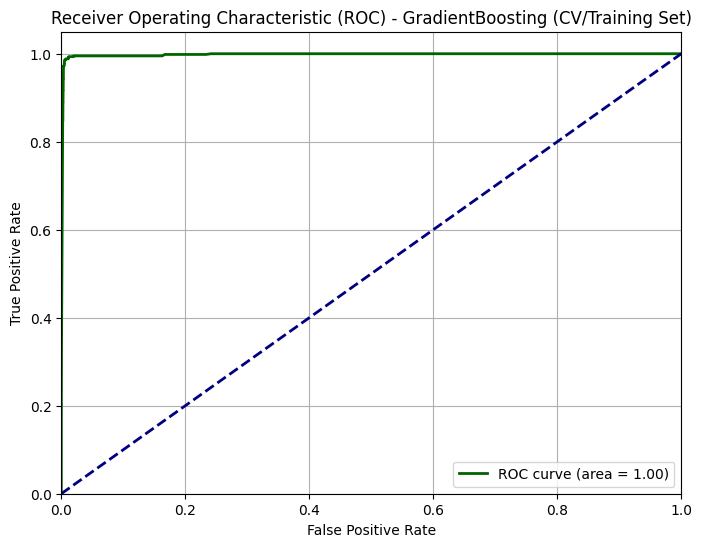

DEBUG: CV metrics added for GradientBoosting


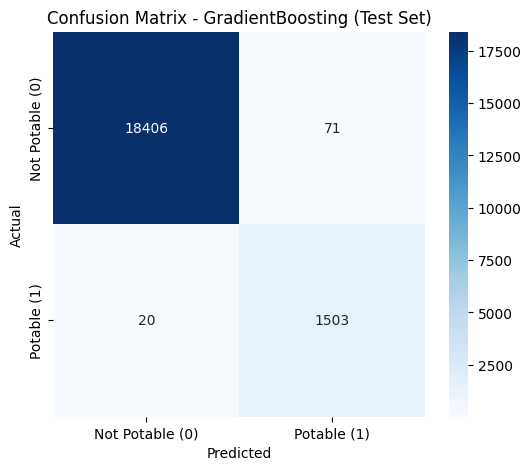

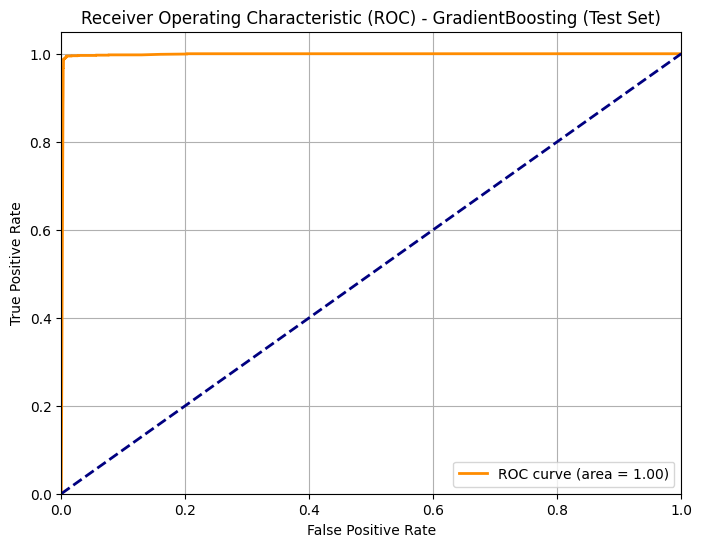

Evaluating Models:  43%|████▎     | 3/7 [00:29<00:47, 11.89s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


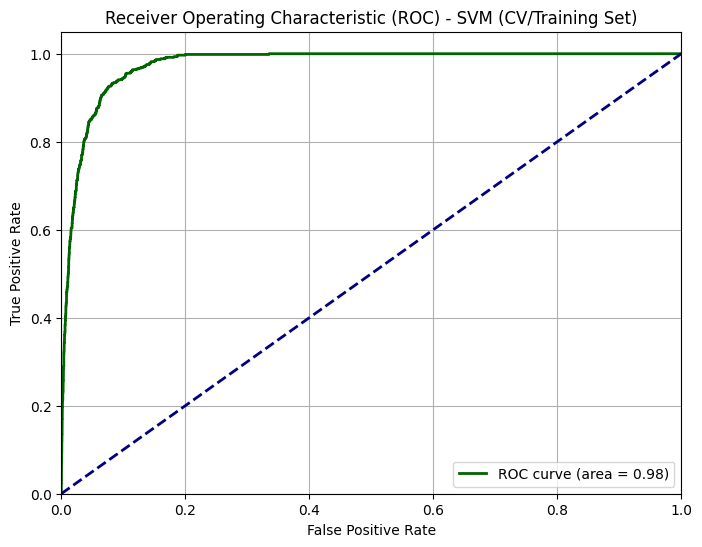

DEBUG: CV metrics added for SVM


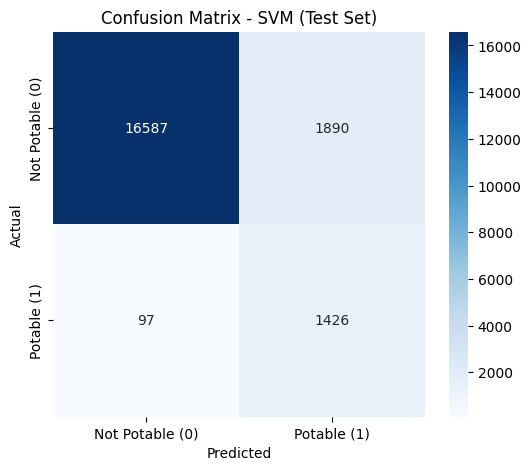

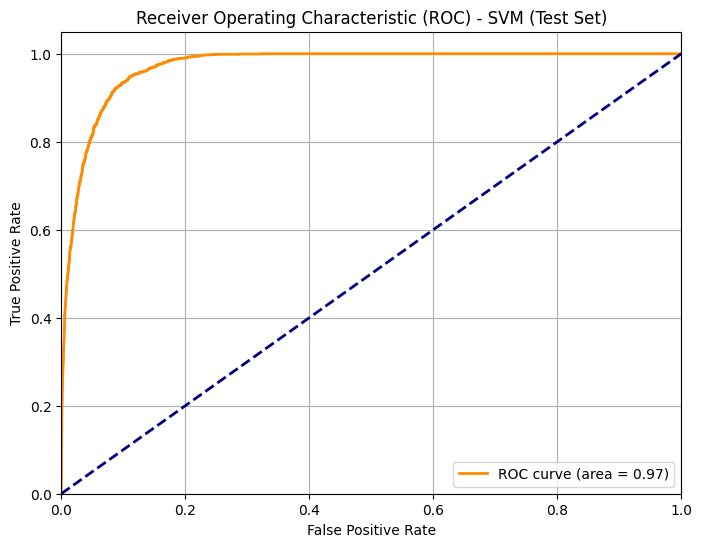

Evaluating Models:  57%|█████▋    | 4/7 [00:53<00:50, 16.75s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


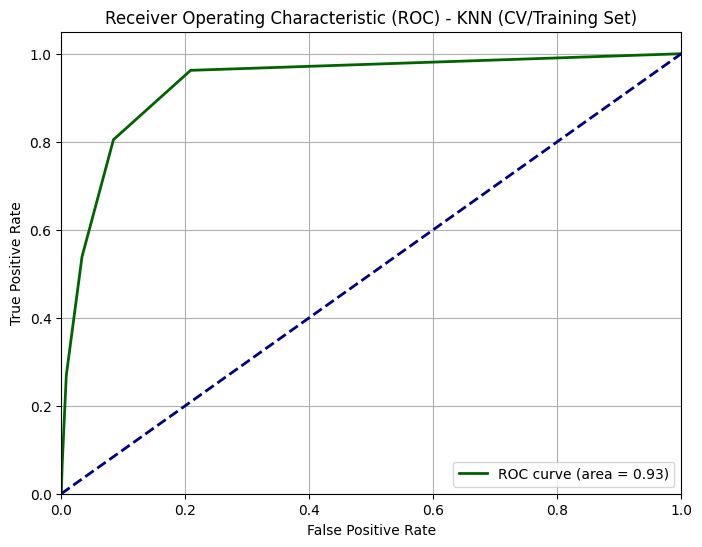

DEBUG: CV metrics added for KNN


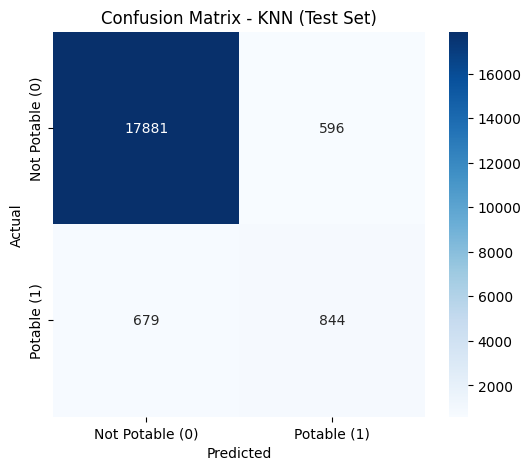

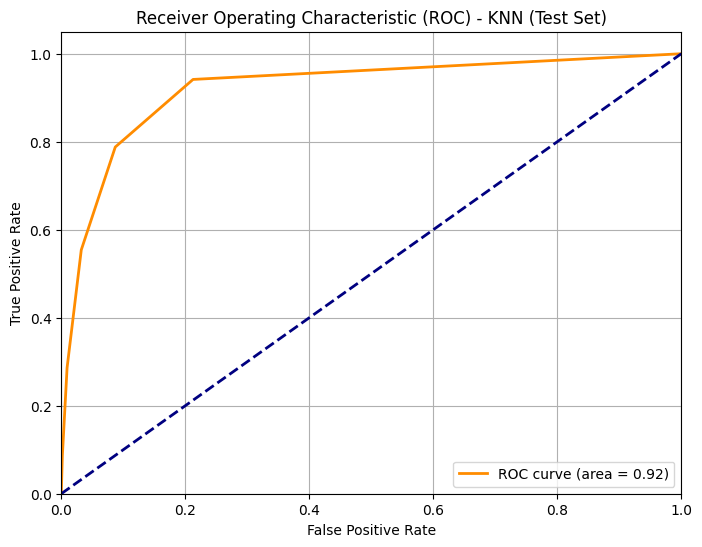

Evaluating Models:  71%|███████▏  | 5/7 [00:57<00:24, 12.39s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

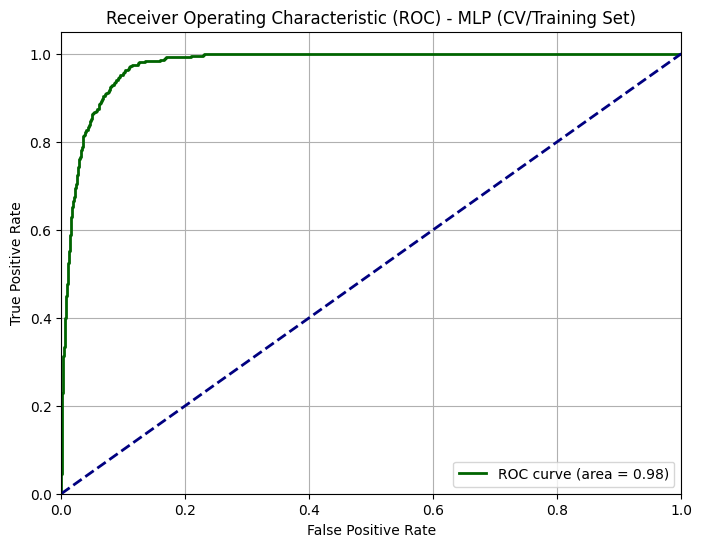

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


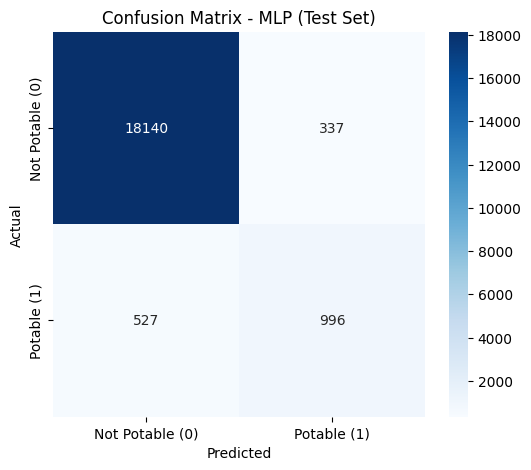

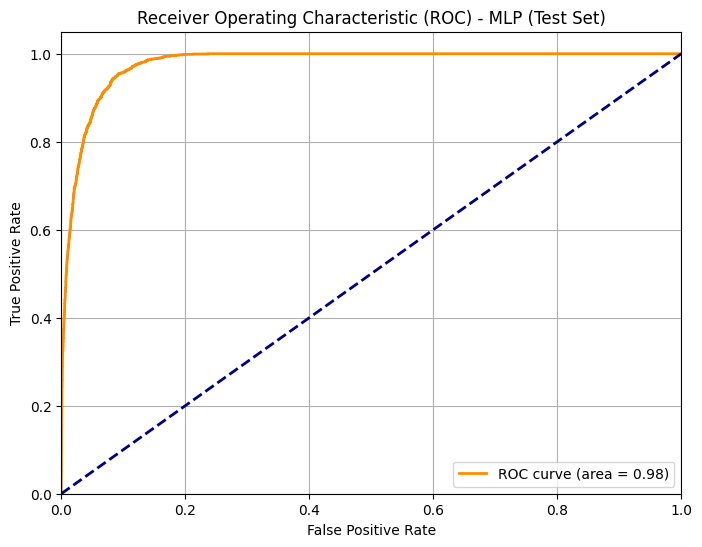

Evaluating Models:  86%|████████▌ | 6/7 [01:43<00:23, 23.76s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...
DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


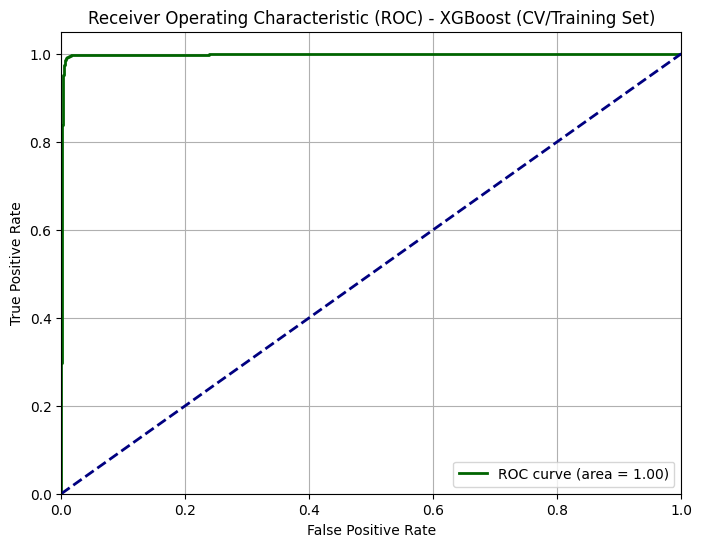

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


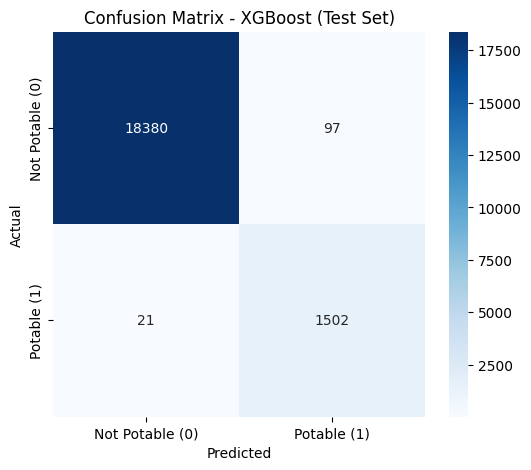

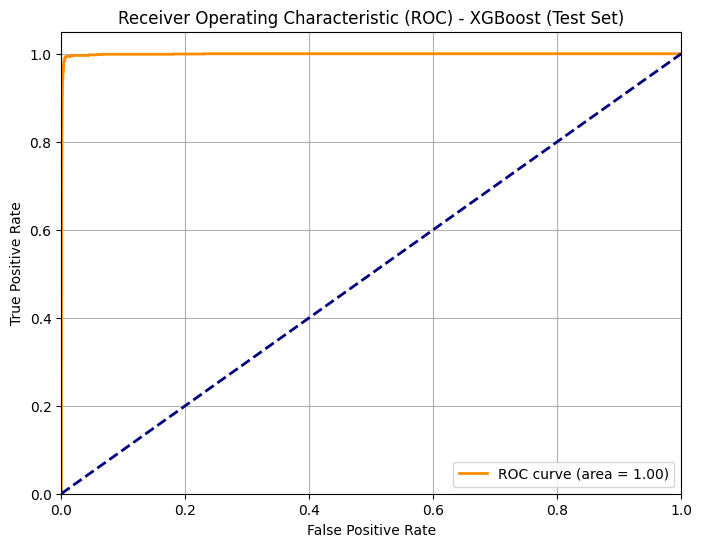

Evaluating Models: 100%|██████████| 7/7 [01:45<00:00, 15.03s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [28]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_half_scaled3, y_train_half3,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

### Comparación de CV y Test

In [29]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.982958  0.780409    0.870051     0.238743   
2         RandomForest     0.998239  0.996888    0.997563     0.962843   
4     GradientBoosting     0.997695  0.995670    0.996682     0.948718   
6                  SVM     0.995061  0.899608    0.944930     0.437026   
8                  KNN     0.962155  0.966581    0.964363     0.570435   
10                 MLP     0.972991  0.979705    0.976337     0.731183   
12             XGBoost     0.998099  0.994588    0.996340     0.937008   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.835796    0.371397  0.784625             0.610851          0.808102   
2   0.978654    0.970684  0.995500             0.980541          0.987771   
4   0.972085    0.960260  0.993875             0.973207          0.983878   
6   0.945813    0.597820  0.903125             0.716044    

### Feature importance

In [30]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.662503
trihalomethanes    1.445981
            tds    1.319565
 organic_carbon    1.032036
       hardness    0.999764
        sulfate    0.871085
      turbidity    0.808506
       chlorine    0.769983
             ph    0.097756

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.210177
            tds    0.189271
trihalomethanes    0.145370
       hardness    0.121977
 organic_carbon    0.106366
        sulfate    0.092119
       chlorine    0.052793
      turbidity    0.049220
             ph    0.032708

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.242006
            tds    0.198204
trihalomethanes    0.168443
       hardness    0.103481
        sulfate    0.096569
 organic_carbon    0.078358
       chlorine    0.041657
      turbidity    0.040195
 

## 5% of training data size

### Splitting

In [31]:
X_train_half3_5, _, y_train_half3_5, _ = train_test_split(
    X_train, y_train, test_size=0.95, random_state=42, stratify=y_train
)

train_indices = set(X_train_half3_5.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_half_scaled3_5 = scaler.fit_transform(X_train_half3_5)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


### Model Evaluation

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


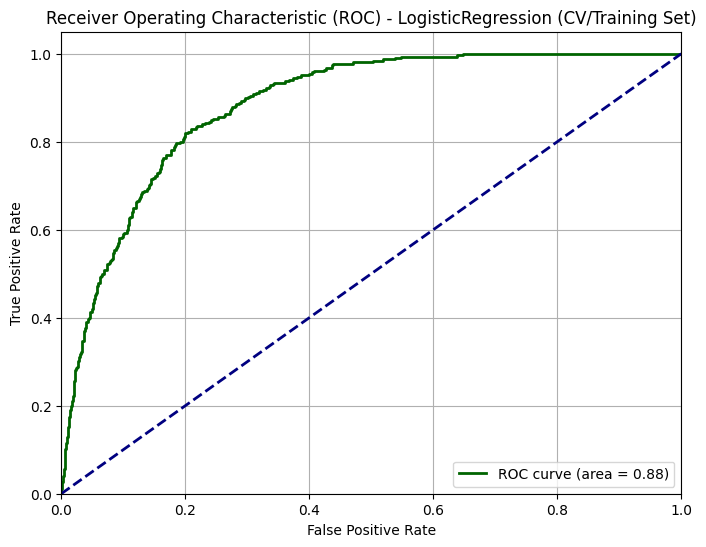

DEBUG: CV metrics added for LogisticRegression


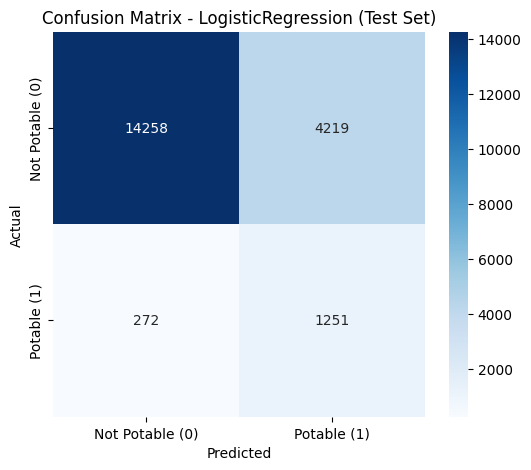

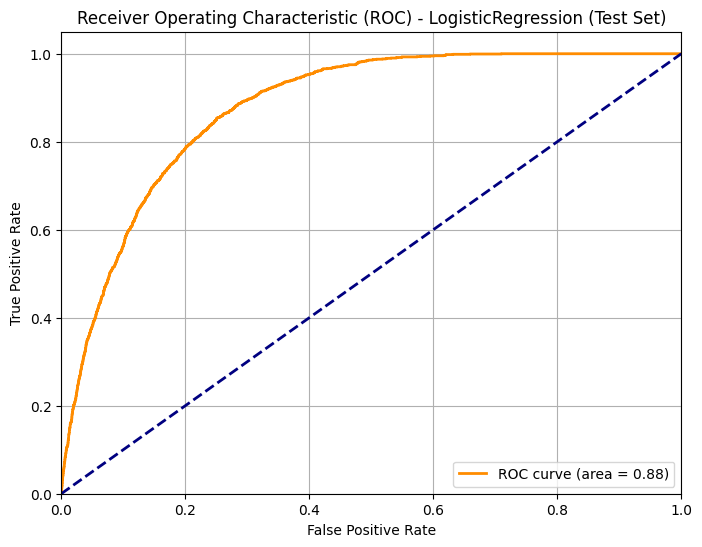

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:02,  2.11it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


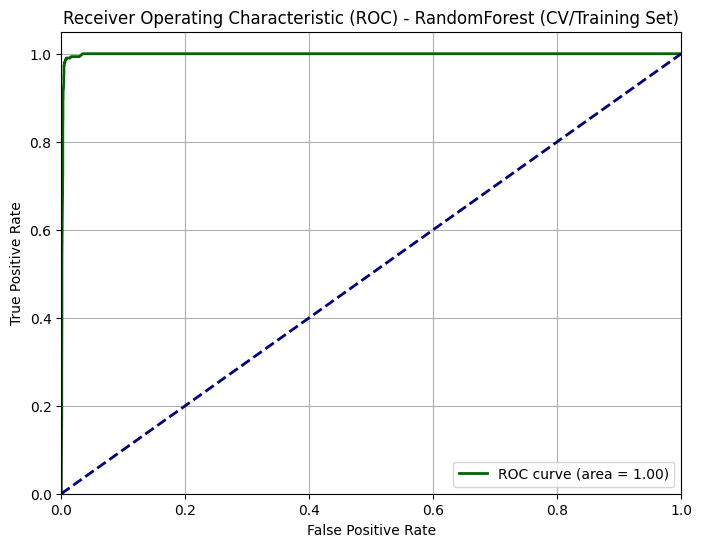

DEBUG: CV metrics added for RandomForest


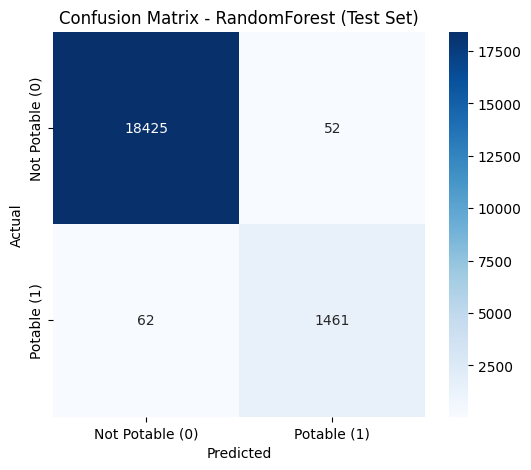

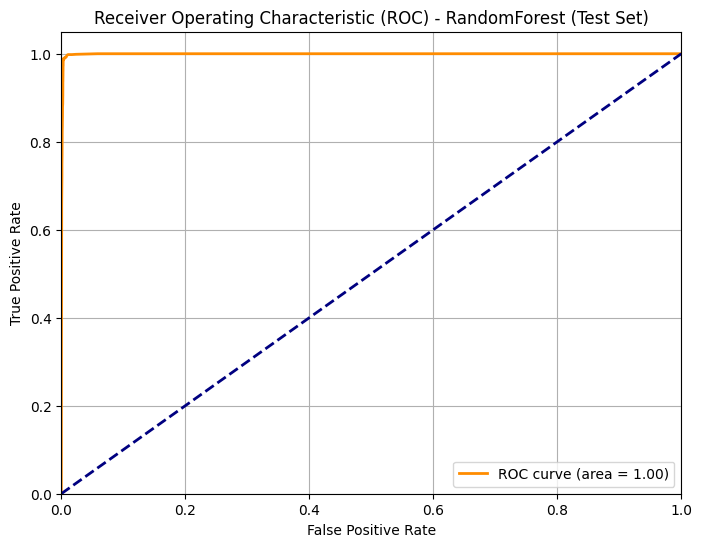

Evaluating Models:  29%|██▊       | 2/7 [00:06<00:17,  3.47s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


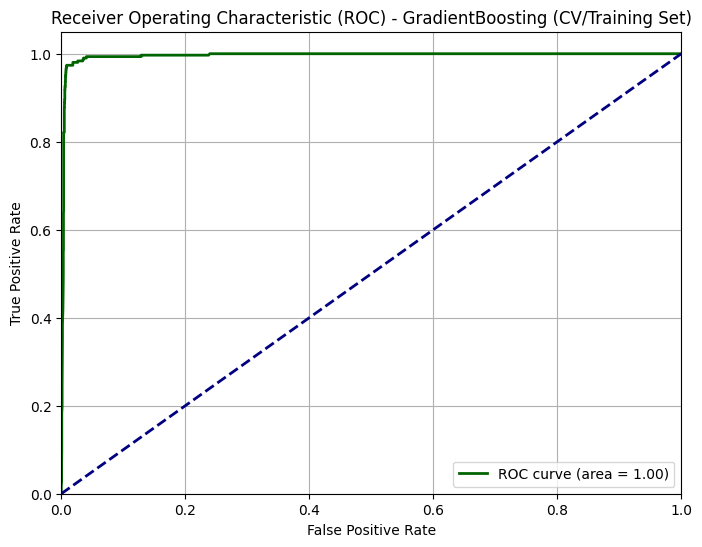

DEBUG: CV metrics added for GradientBoosting


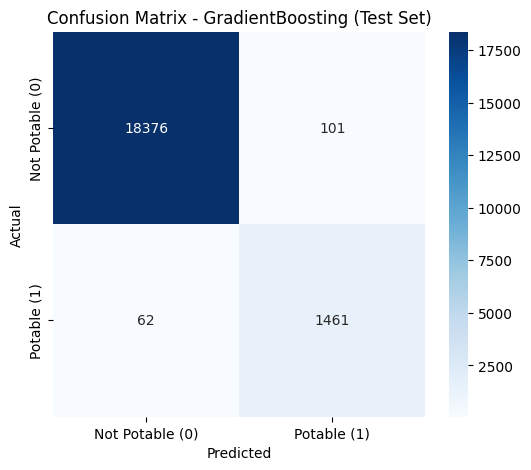

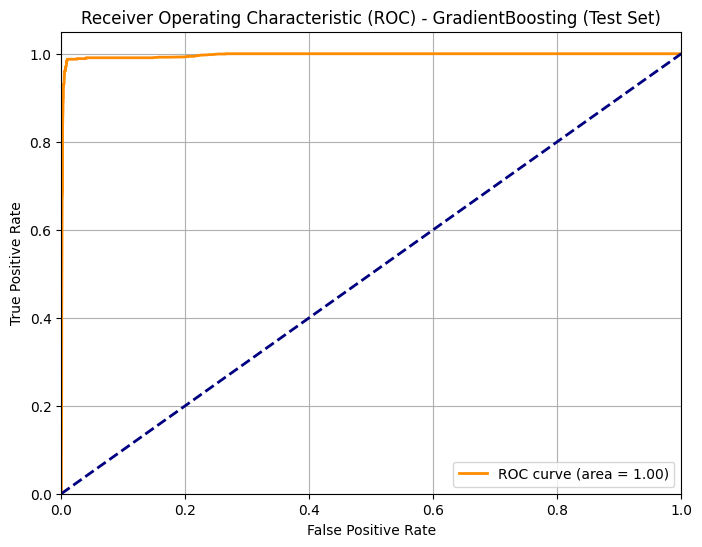

Evaluating Models:  43%|████▎     | 3/7 [00:16<00:26,  6.67s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


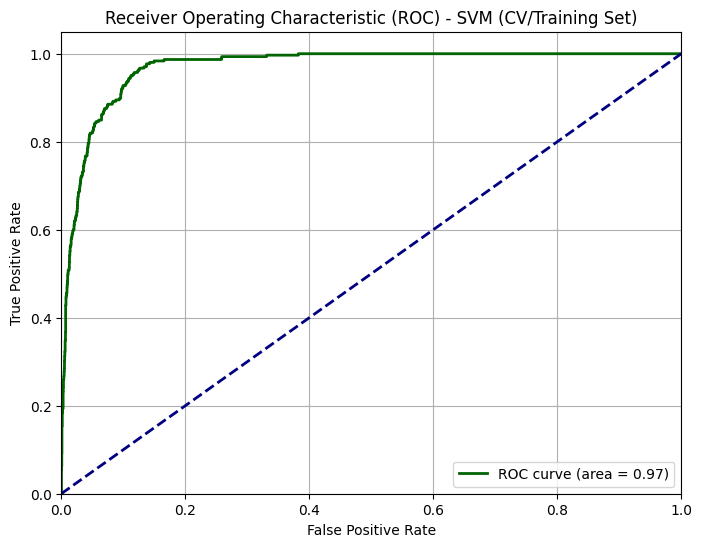

DEBUG: CV metrics added for SVM


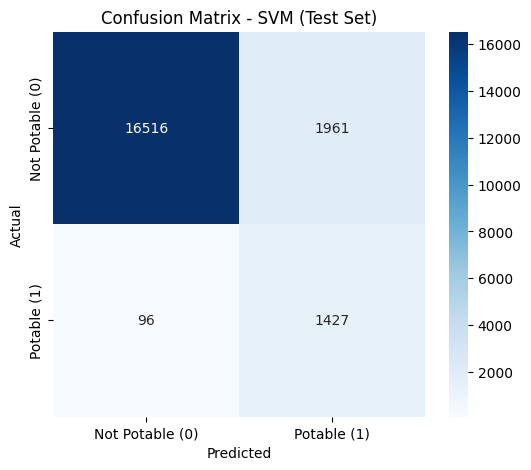

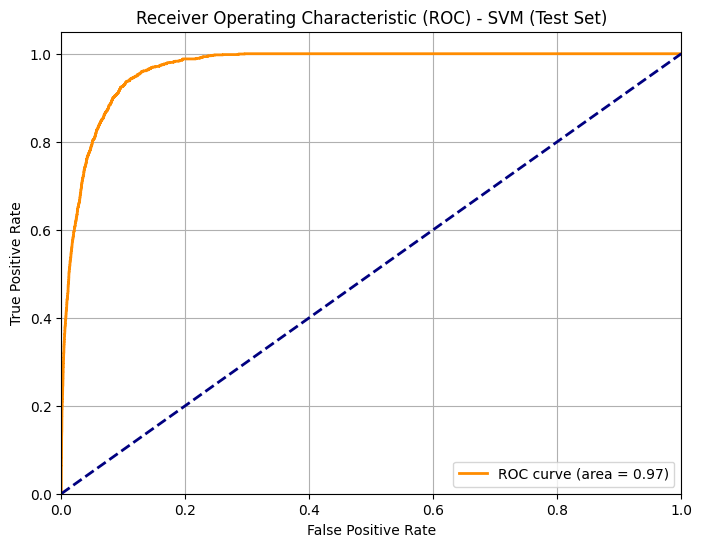

Evaluating Models:  57%|█████▋    | 4/7 [00:24<00:21,  7.23s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


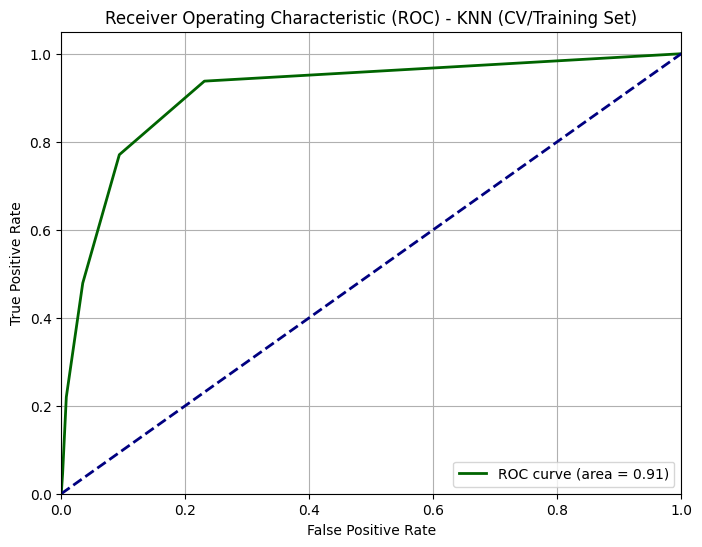

DEBUG: CV metrics added for KNN


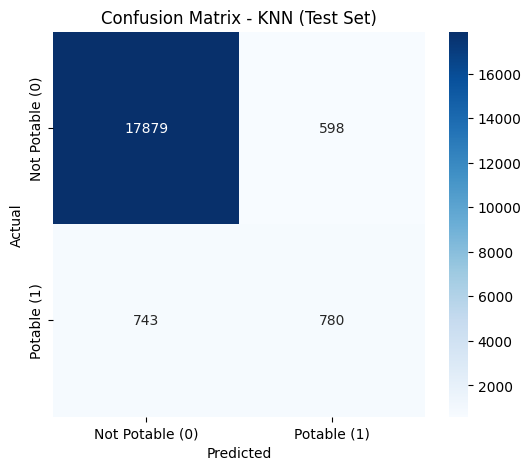

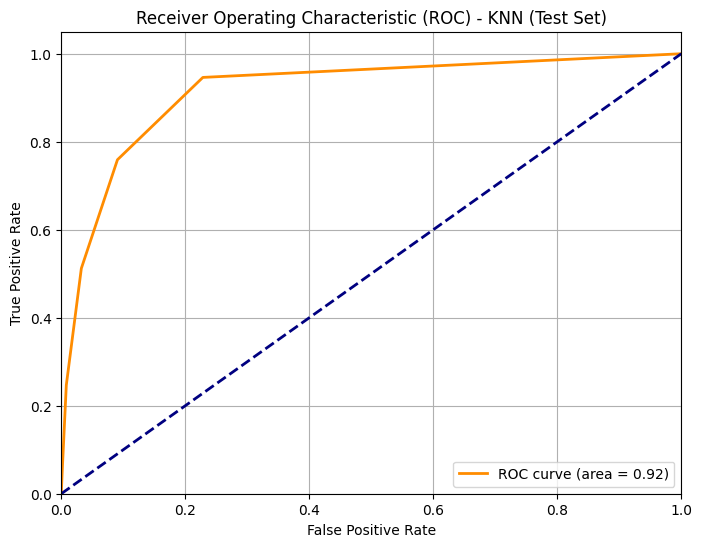

Evaluating Models:  71%|███████▏  | 5/7 [00:27<00:11,  5.71s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

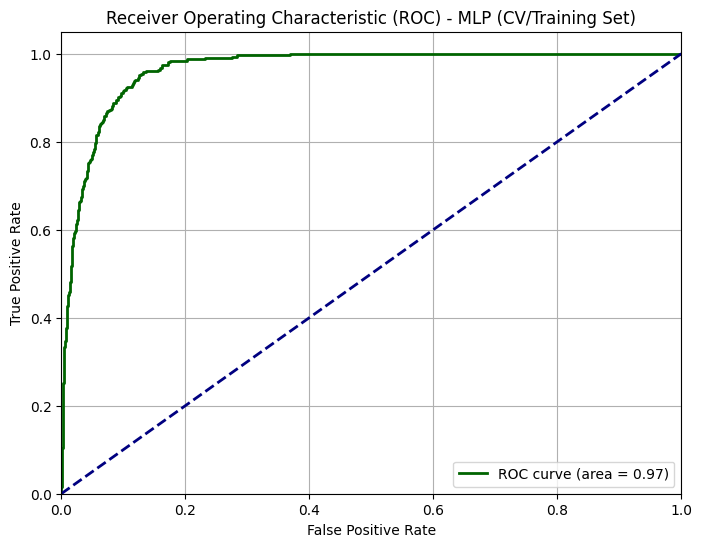

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


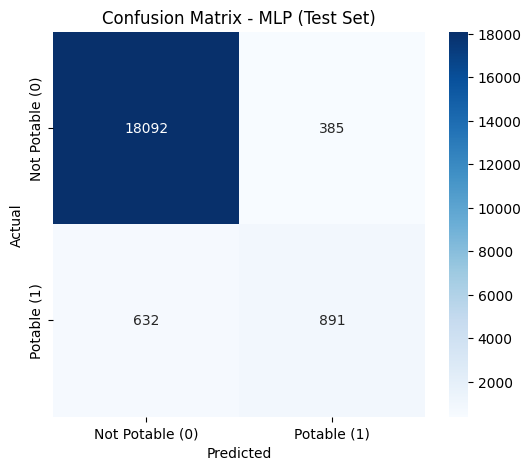

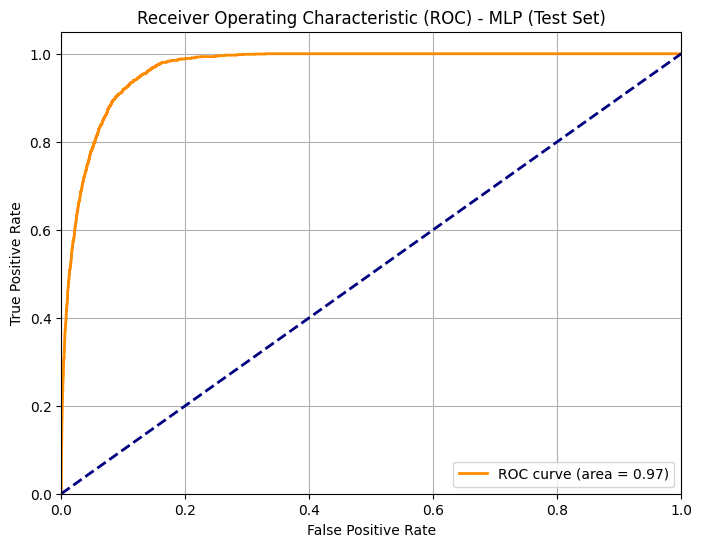

Evaluating Models:  86%|████████▌ | 6/7 [00:50<00:11, 11.56s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...
DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


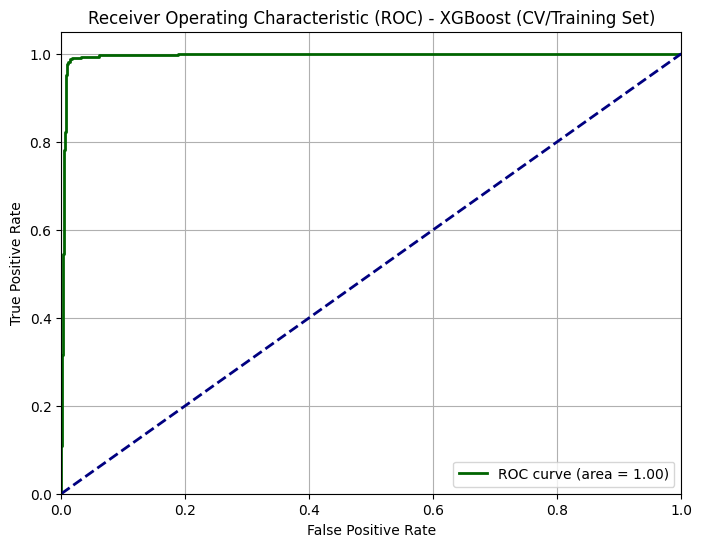

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


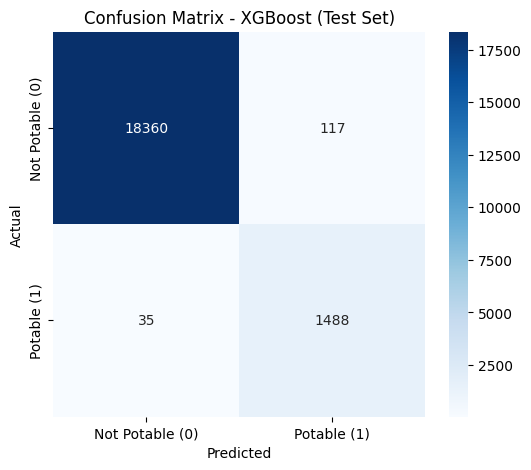

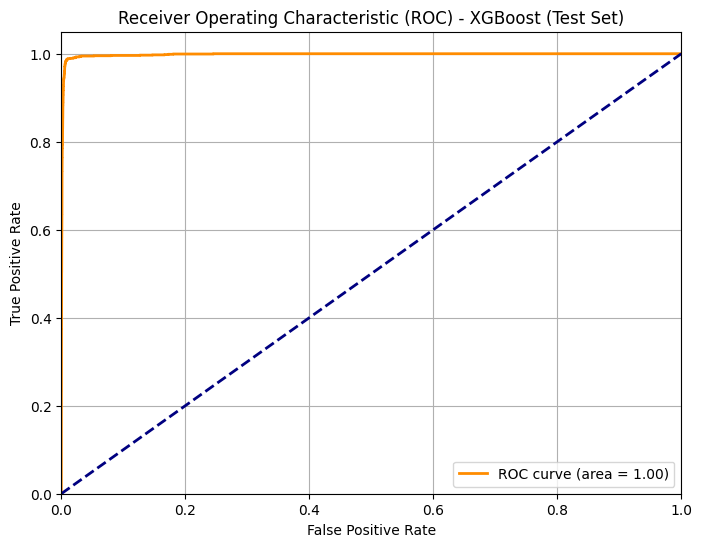

Evaluating Models: 100%|██████████| 7/7 [00:51<00:00,  7.36s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [32]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_half_scaled3_5, y_train_half3_5,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

### Comparación de metricas de evaluación

In [33]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.982355  0.783491    0.871725     0.240266   
2         RandomForest     0.995940  0.995940    0.995940     0.950820   
4     GradientBoosting     0.995658  0.992963    0.994309     0.917460   
6                  SVM     0.993976  0.893099    0.940841     0.419118   
8                  KNN     0.957327  0.965359    0.961326     0.532847   
10                 MLP     0.965894  0.981055    0.973416     0.716599   
12             XGBoost     0.996734  0.991069    0.993893     0.898773   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.829508    0.372607   0.78700             0.611310          0.806500   
2   0.950820    0.950820   0.99250             0.973380          0.973380   
4   0.947541    0.932258   0.98950             0.956559          0.970252   
6   0.934426    0.578680   0.89625             0.706547    

### Feature importance

In [34]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.690040
trihalomethanes    1.523715
            tds    1.314219
 organic_carbon    1.081083
       hardness    0.930286
        sulfate    0.906879
      turbidity    0.838899
       chlorine    0.601025
             ph    0.080093

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.212066
            tds    0.188274
trihalomethanes    0.139081
       hardness    0.113523
 organic_carbon    0.113236
        sulfate    0.095316
       chlorine    0.052739
      turbidity    0.052176
             ph    0.033589

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.231040
            tds    0.190889
trihalomethanes    0.145135
 organic_carbon    0.120004
        sulfate    0.098461
       hardness    0.097690
      turbidity    0.042783
       chlorine    0.042443
 

In [35]:
counts = y_train_half3_5.value_counts()

print(counts)

potability
0    3695
1     305
Name: count, dtype: int64


## 1% of training data size

In [36]:
X_train_half4, _, y_train_half4, _ = train_test_split(
    X_train, y_train, test_size=0.99, random_state=42, stratify=y_train
)

train_indices = set(X_train_half4.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler = RobustScaler()
X_train_half_scaled4 = scaler.fit_transform(X_train_half4)
X_test_scaled = scaler.transform(X_test)

Overlapping indices: 0


### Evaluación de clasificadores

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.
DEBUG: All feature importances extracted for LogisticRegression.


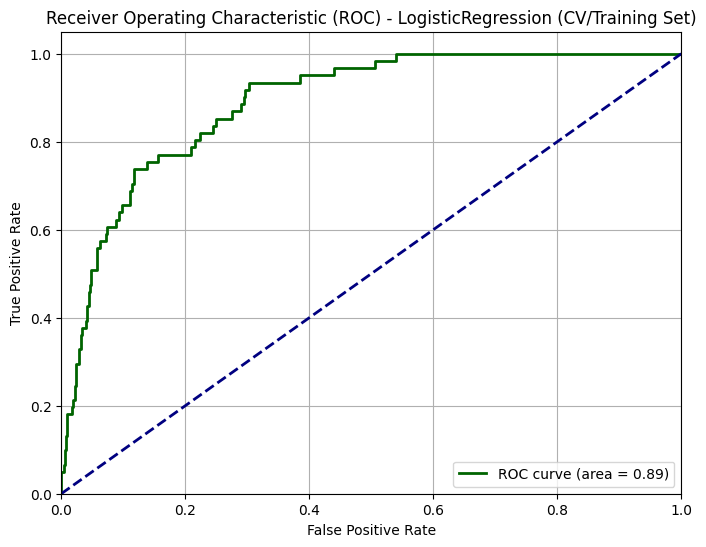

DEBUG: CV metrics added for LogisticRegression


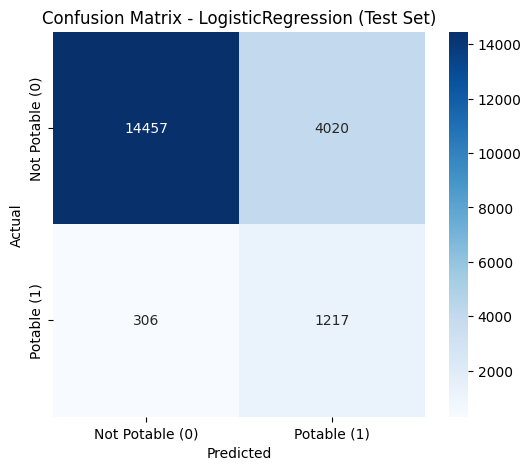

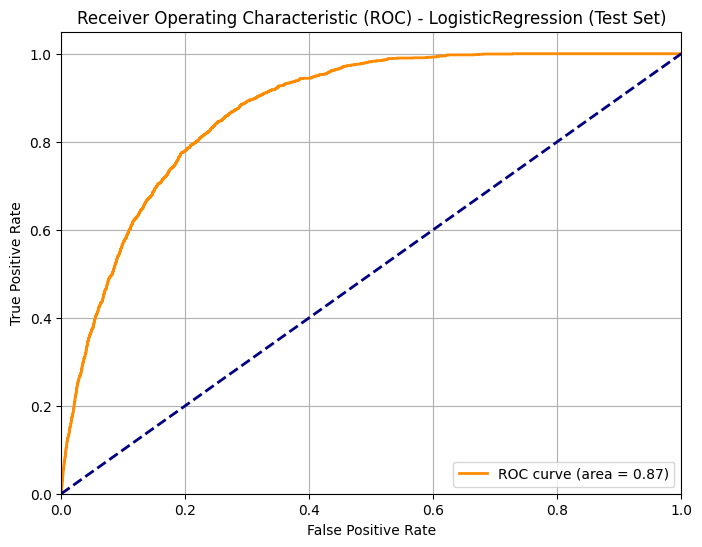

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:02,  2.48it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.
DEBUG: All feature importances extracted for RandomForest.


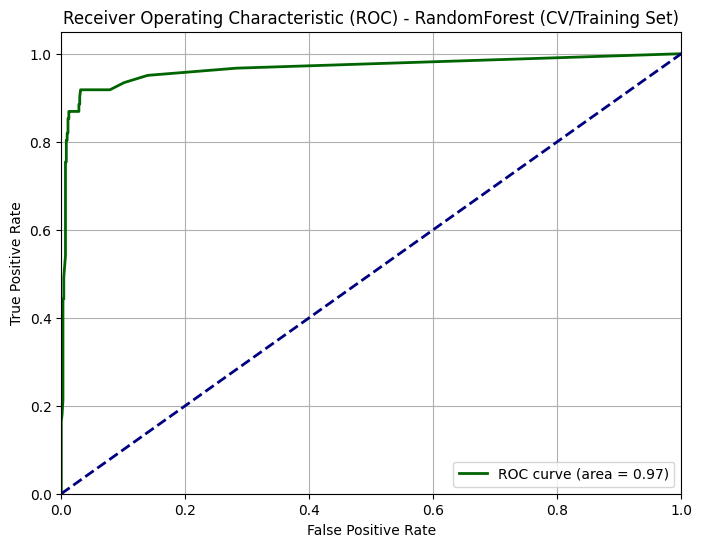

DEBUG: CV metrics added for RandomForest


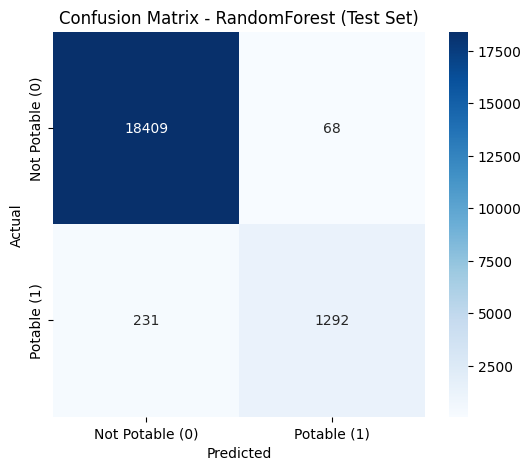

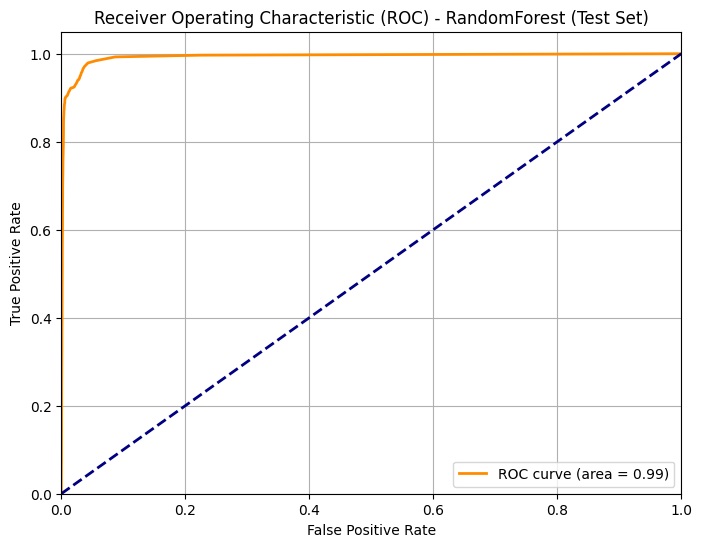

Evaluating Models:  29%|██▊       | 2/7 [00:02<00:07,  1.42s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.
DEBUG: All feature importances extracted for GradientBoosting.


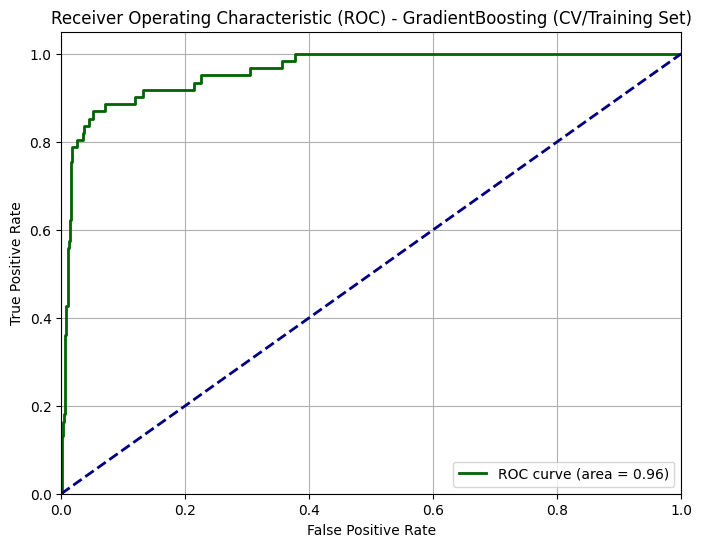

DEBUG: CV metrics added for GradientBoosting


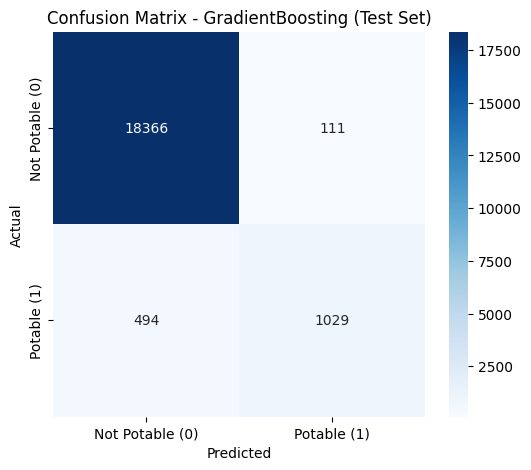

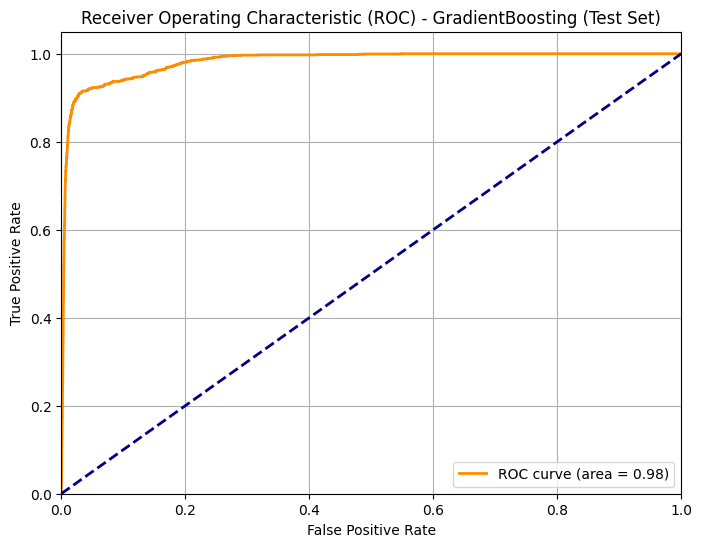

Evaluating Models:  43%|████▎     | 3/7 [00:05<00:08,  2.10s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.
DEBUG: SVM - No coef_ attribute after training (e.g., non-linear SVM).
DEBUG: No feature importances could be extracted for SVM.


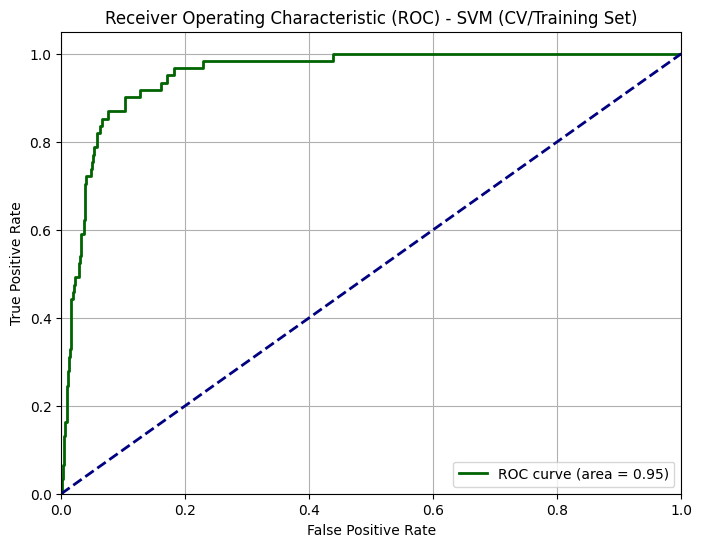

DEBUG: CV metrics added for SVM


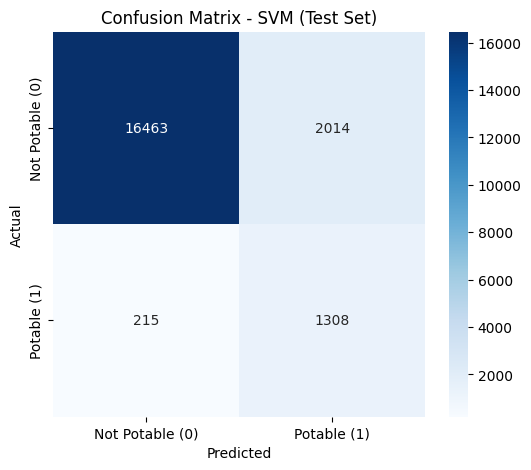

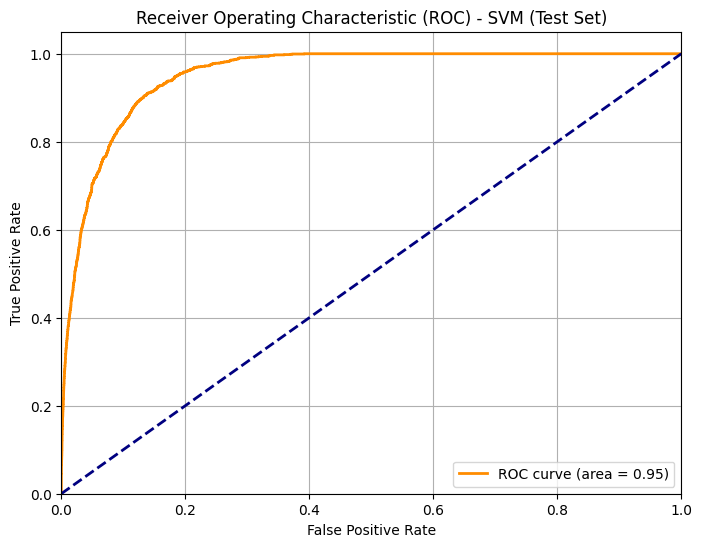

Evaluating Models:  57%|█████▋    | 4/7 [00:06<00:05,  1.72s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.
DEBUG: KNN - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for KNN.


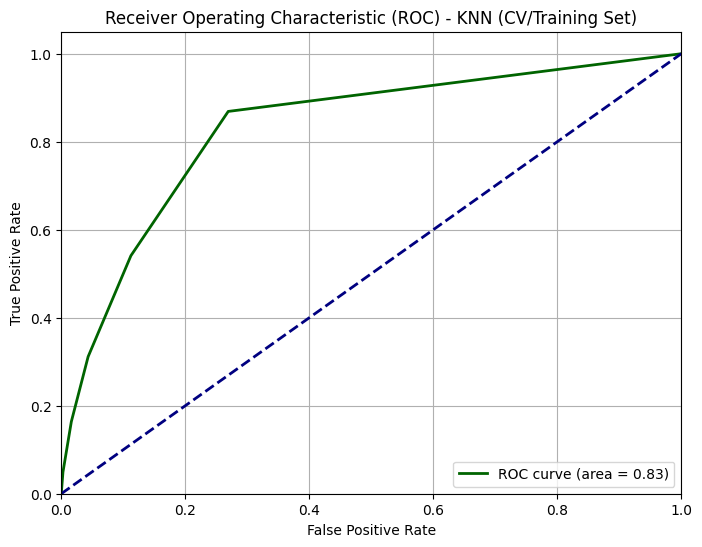

DEBUG: CV metrics added for KNN


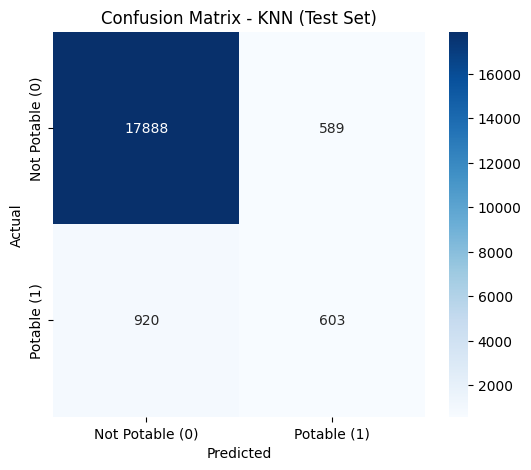

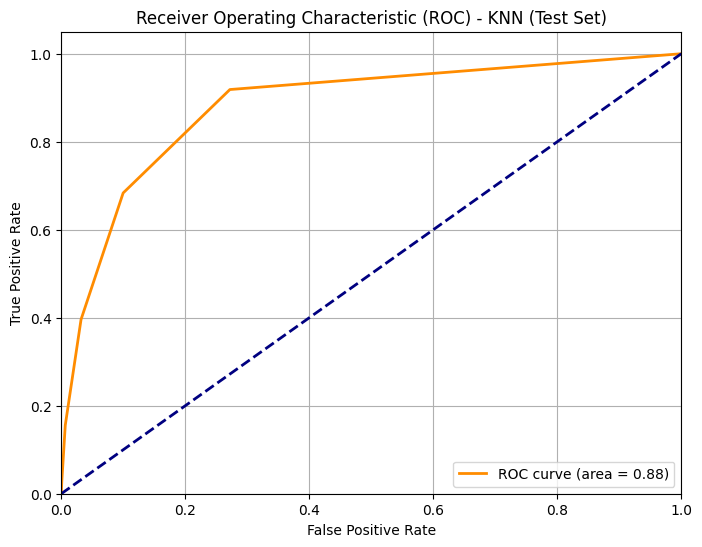

Evaluating Models:  71%|███████▏  | 5/7 [00:07<00:03,  1.57s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.
DEBUG: MLP - No direct feature importance attribute (coef_ or feature_importances_).
DEBUG: No feature importances could be extracted for MLP.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

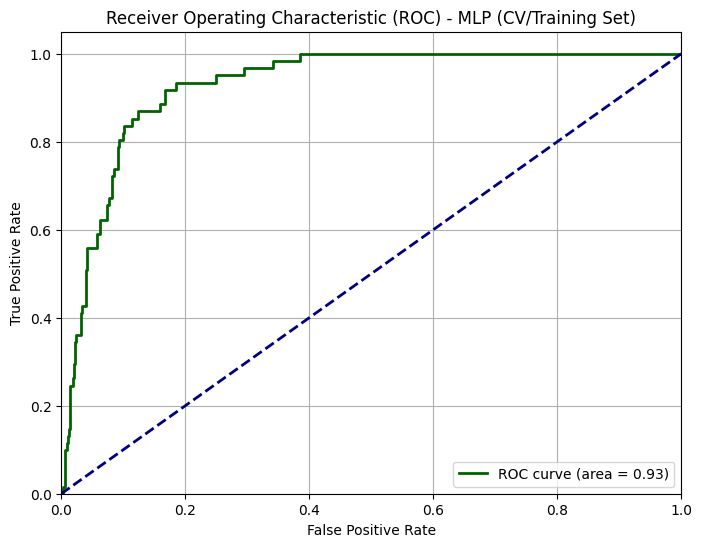

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


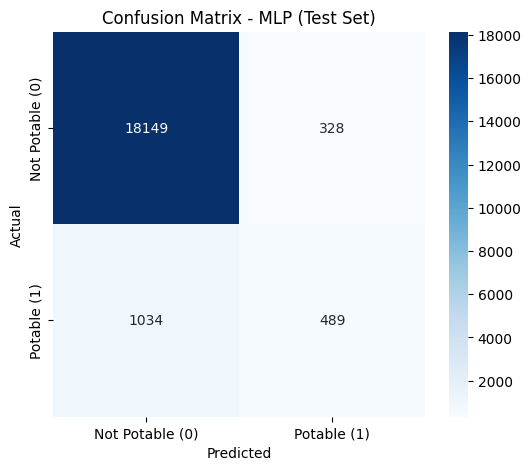

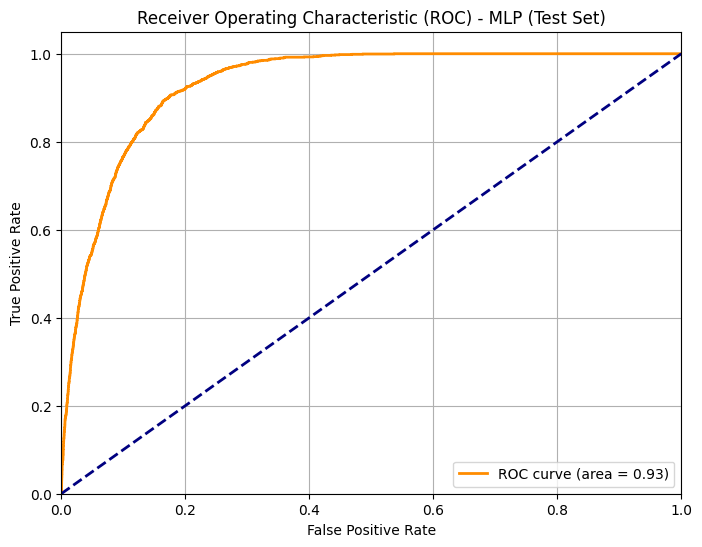

Evaluating Models:  86%|████████▌ | 6/7 [00:13<00:02,  2.80s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...
DEBUG: XGBoost - Model fitted successfully.
DEBUG: All feature importances extracted for XGBoost.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


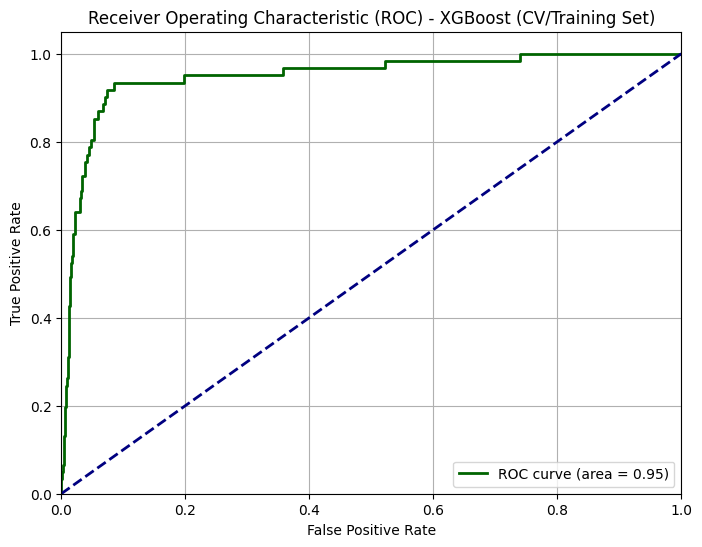

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:04:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


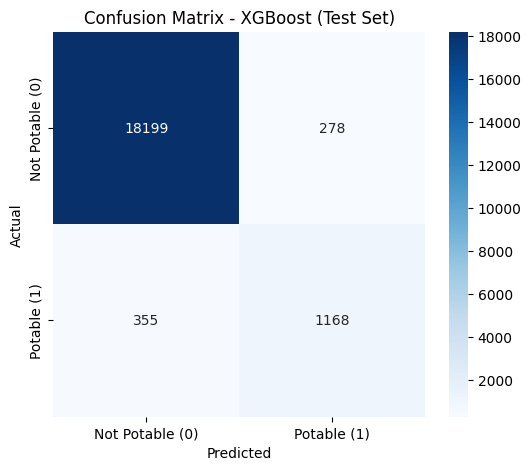

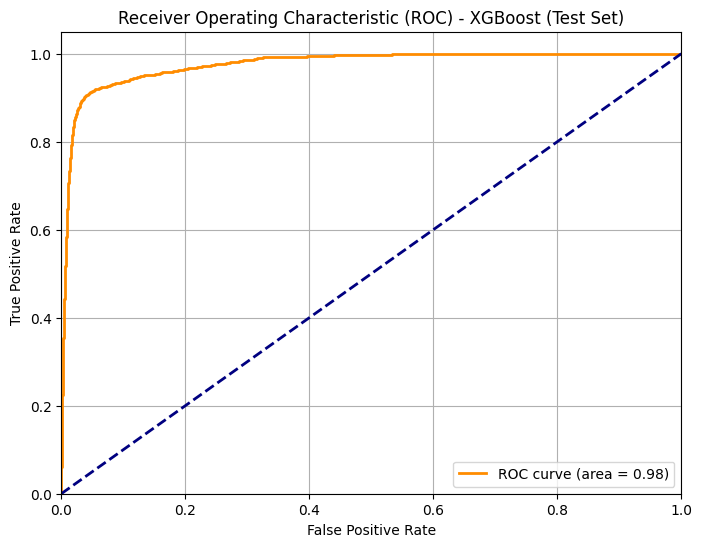

Evaluating Models: 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [37]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_half_scaled4, y_train_half4,
    X_test_scaled, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

### Comparación de metricas de evaluación entre CV y Testing

In [38]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.977049  0.806495    0.883617     0.247368   
2         RandomForest     0.981258  0.991881    0.986541     0.886792   
4     GradientBoosting     0.958060  0.989175    0.973369     0.783784   
6                  SVM     0.990950  0.889039    0.937233     0.401460   
8                  KNN     0.943925  0.956698    0.950269     0.372549   
10                 MLP     0.947438  0.975643    0.961333     0.538462   
12             XGBoost     0.970350  0.974290    0.972316     0.672414   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.770492    0.374502   0.80375             0.612209          0.788494   
2   0.770492    0.824561   0.97500             0.934025          0.881186   
4   0.475410    0.591837   0.95000             0.870922          0.732292   
6   0.901639    0.555556   0.89000             0.696205    

### Feature importance

In [39]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---

--- LogisticRegression Feature Importances ---
        Feature  Importance
   conductivity    1.580522
trihalomethanes    1.443481
            tds    1.175945
 organic_carbon    1.093404
      turbidity    1.026815
       chlorine    1.024912
        sulfate    0.977810
       hardness    0.794484
             ph    0.159997

--- RandomForest Feature Importances ---
        Feature  Importance
   conductivity    0.220142
            tds    0.157958
trihalomethanes    0.153011
       hardness    0.117340
 organic_carbon    0.109460
        sulfate    0.108345
      turbidity    0.060084
       chlorine    0.049679
             ph    0.023980

--- GradientBoosting Feature Importances ---
        Feature  Importance
   conductivity    0.211691
            tds    0.154896
trihalomethanes    0.143815
       hardness    0.135356
        sulfate    0.120247
 organic_carbon    0.108901
      turbidity    0.060112
       chlorine    0.049931
 

### Results

Based on the results, we can see that the sweet spot will be the 5%, something greater will only make it have a slower time (With practically the same results) and having something lower than that now starts to hurt the model in having worse results (And with only little difference of time).

# Feature selection

## Dropping PH

### Initial configuration

In [40]:
features_to_drop = ['ph']

X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

### Splitting and scaling

In [41]:
X_train_noph, _, y_train_noph, _ = train_test_split(
    X_train_reduced, y_train, test_size=0.95, random_state=42, stratify=y_train
)

train_indices = set(X_train_noph.index)
test_indices = set(X_test_reduced.index)
overlap = train_indices.intersection(test_indices)
print(f"Overlapping indices: {len(overlap)}")

scaler_reduced = RobustScaler()
X_train_scaled_noph = scaler_reduced.fit_transform(X_train_noph)
X_test_scaled_noph = scaler_reduced.transform(X_test_reduced) 

Overlapping indices: 0


### Classifier Evaluation

Evaluating Models:   0%|          | 0/7 [00:00<?, ?it/s]


Evaluating LogisticRegression...
DEBUG: LogisticRegression - Model fitted successfully.


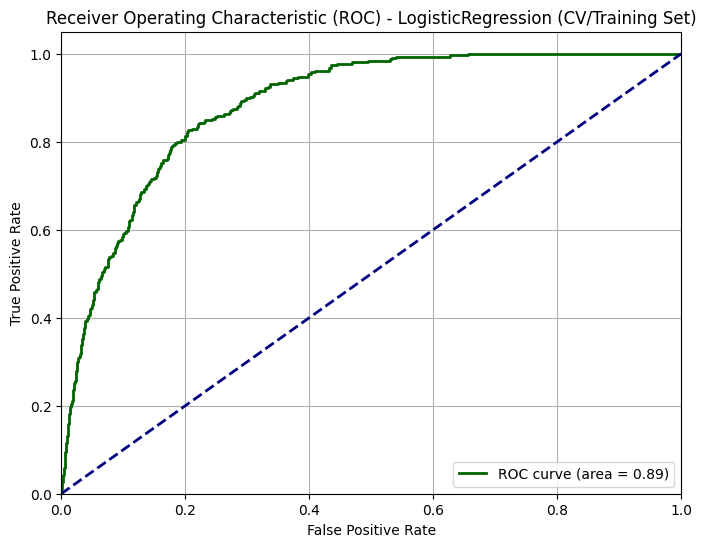

DEBUG: CV metrics added for LogisticRegression


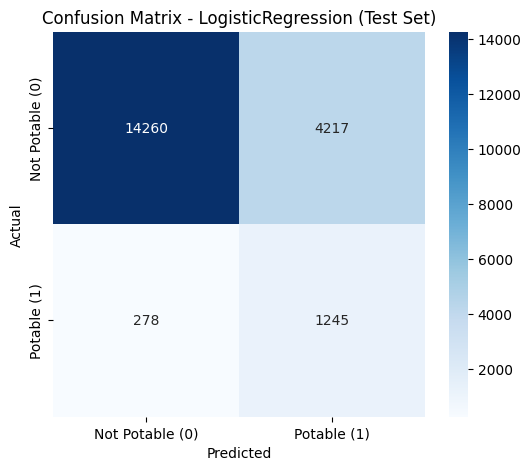

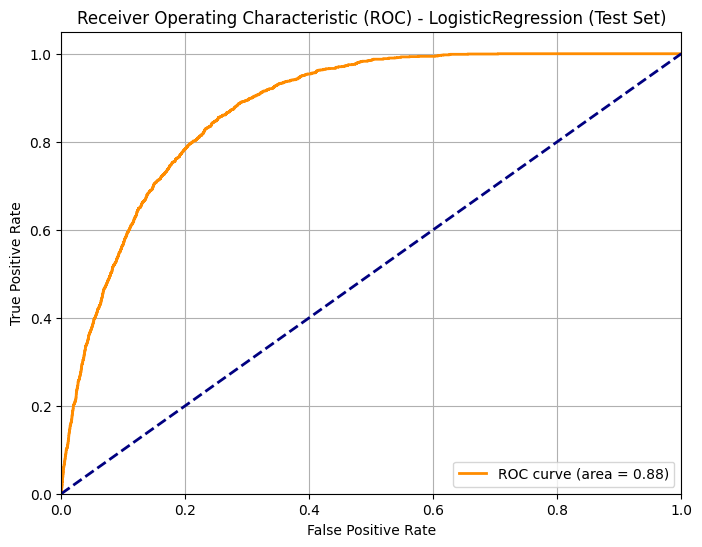

Evaluating Models:  14%|█▍        | 1/7 [00:00<00:02,  2.34it/s]

DEBUG: Test metrics added for LogisticRegression

Evaluating RandomForest...
DEBUG: RandomForest - Model fitted successfully.


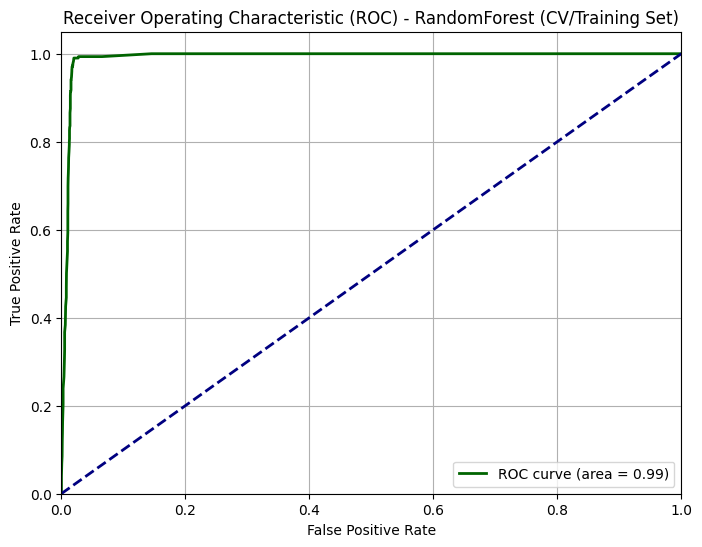

DEBUG: CV metrics added for RandomForest


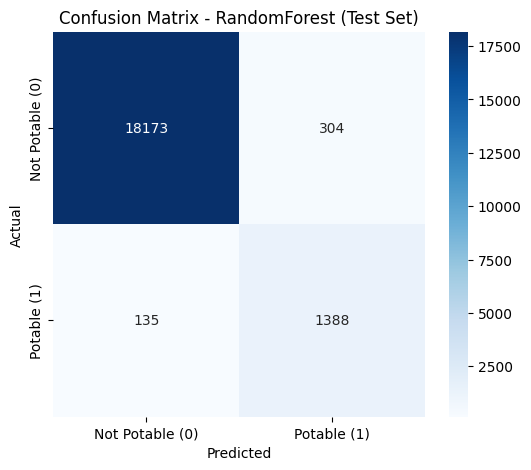

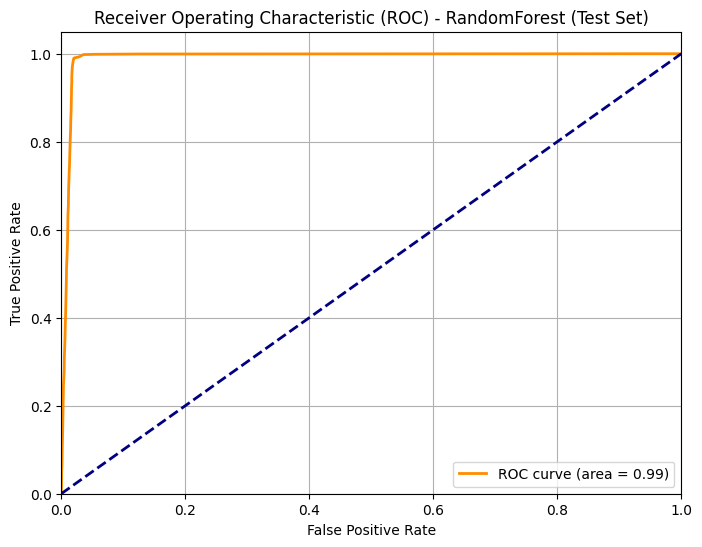

Evaluating Models:  29%|██▊       | 2/7 [00:05<00:14,  2.94s/it]

DEBUG: Test metrics added for RandomForest

Evaluating GradientBoosting...
DEBUG: GradientBoosting - Model fitted successfully.


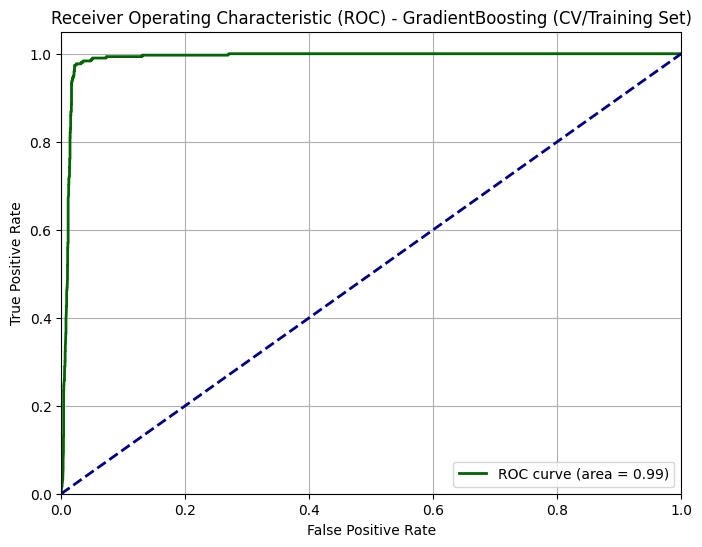

DEBUG: CV metrics added for GradientBoosting


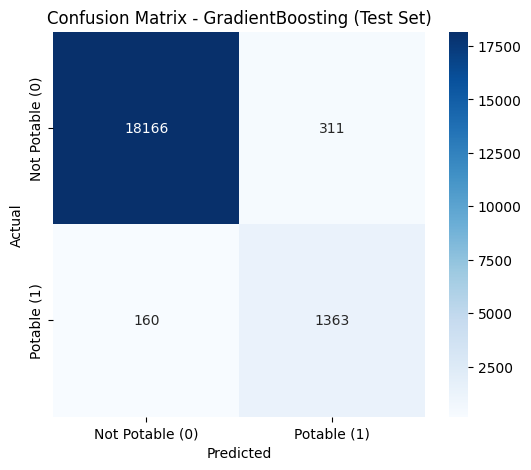

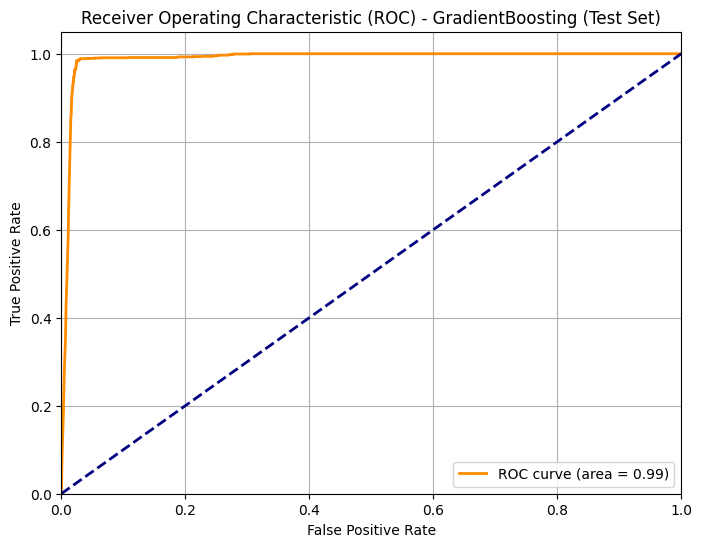

Evaluating Models:  43%|████▎     | 3/7 [00:14<00:24,  6.06s/it]

DEBUG: Test metrics added for GradientBoosting

Evaluating SVM...
DEBUG: SVM - Model fitted successfully.


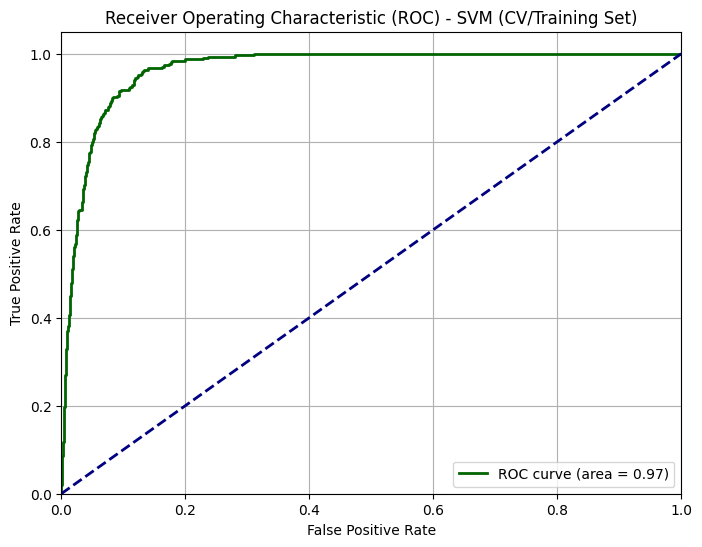

DEBUG: CV metrics added for SVM


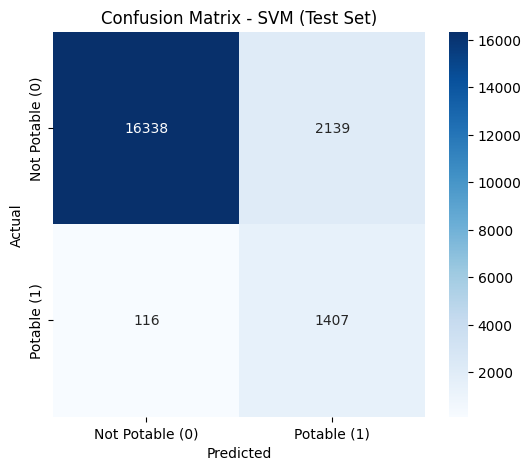

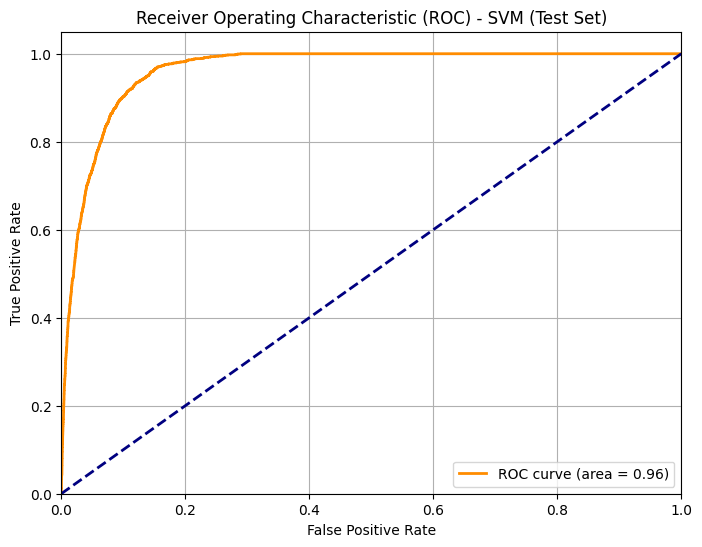

Evaluating Models:  57%|█████▋    | 4/7 [00:22<00:20,  6.80s/it]

DEBUG: Test metrics added for SVM

Evaluating KNN...
DEBUG: KNN - Model fitted successfully.


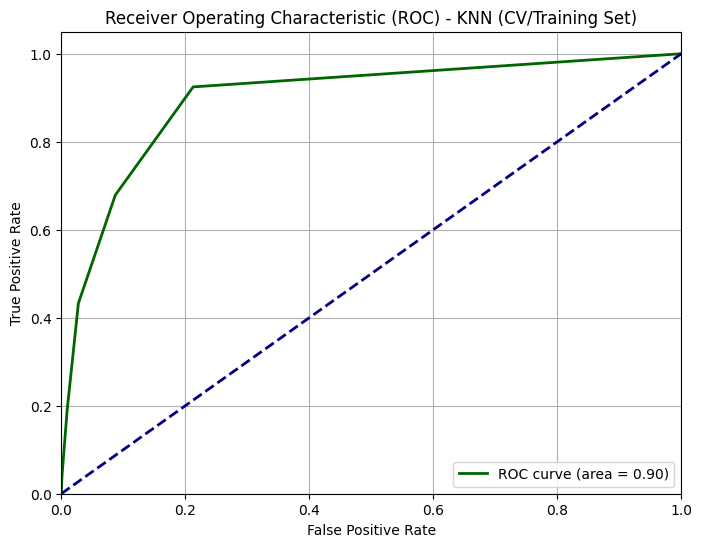

DEBUG: CV metrics added for KNN


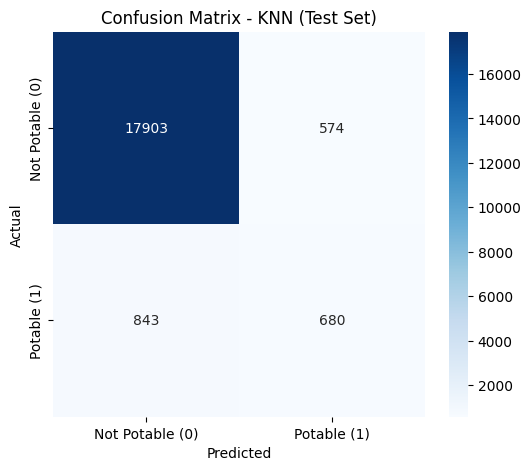

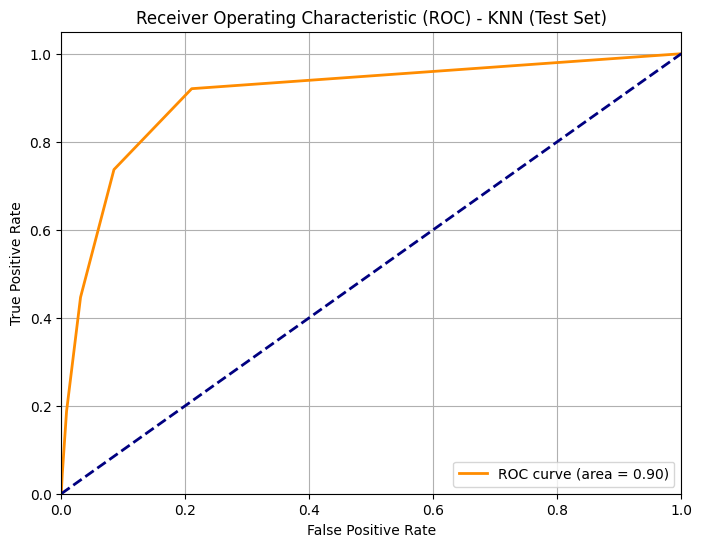

Evaluating Models:  71%|███████▏  | 5/7 [00:25<00:10,  5.18s/it]

DEBUG: Test metrics added for KNN

Evaluating MLP...


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


DEBUG: MLP - Model fitted successfully.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

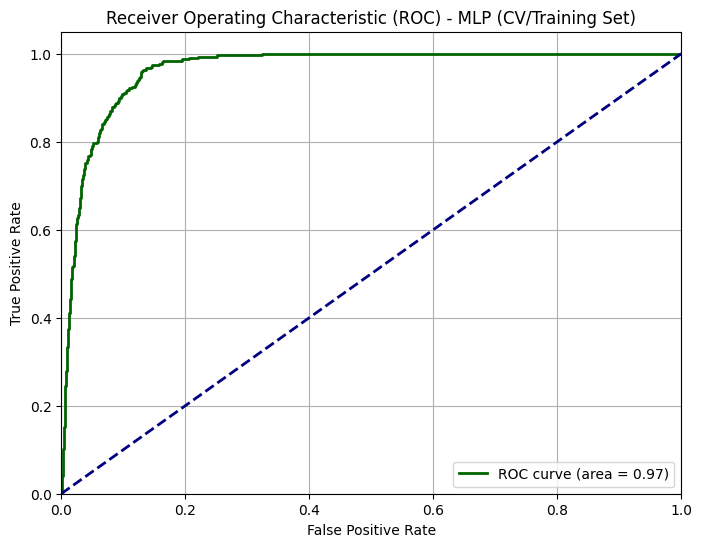

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_ne

DEBUG: CV metrics added for MLP


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


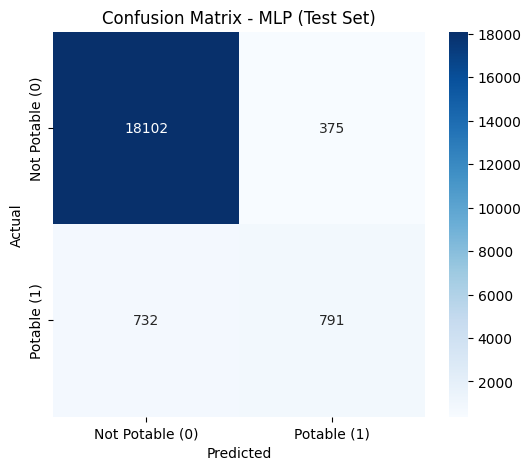

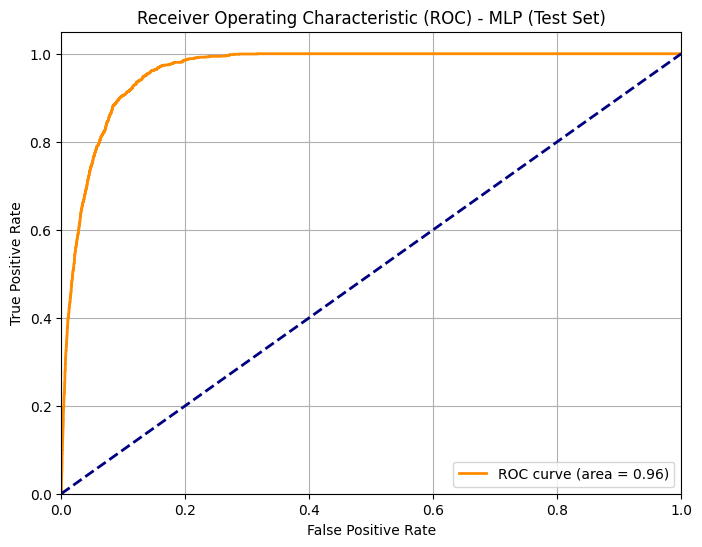

Evaluating Models:  86%|████████▌ | 6/7 [00:47<00:11, 11.01s/it]

DEBUG: Test metrics added for MLP

Evaluating XGBoost...
DEBUG: XGBoost - Model fitted successfully.


c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


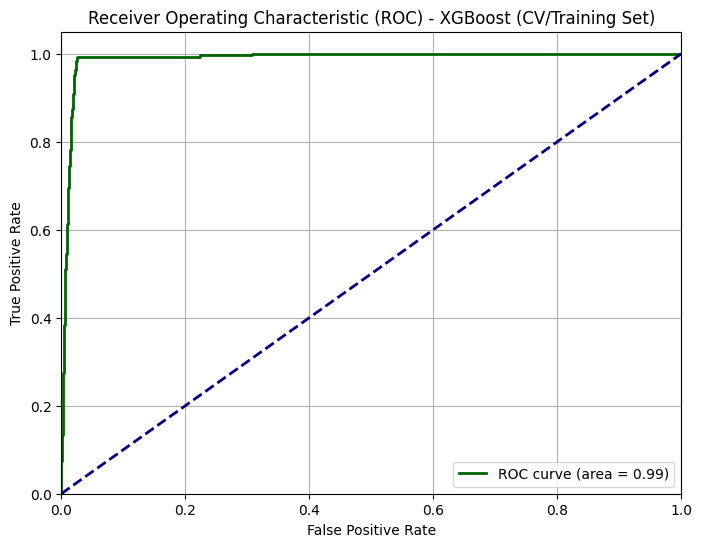

c:\Users\gael_\OneDrive\Documents\Tareas\6to\Mineria_de_Datos\EasyWater\EasyWater_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEBUG: CV metrics added for XGBoost


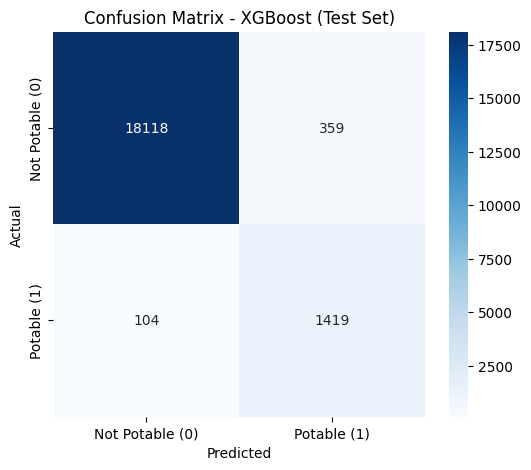

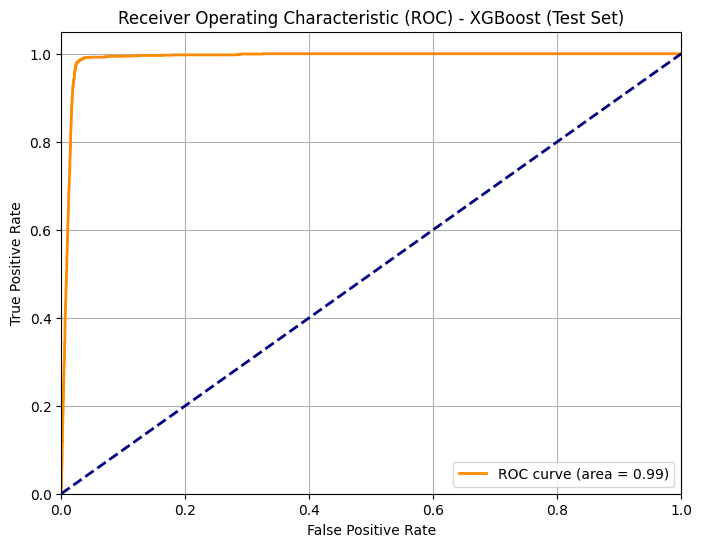

Evaluating Models: 100%|██████████| 7/7 [00:48<00:00,  6.94s/it]

DEBUG: Test metrics added for XGBoost
Dataframe with results completed. 



In [42]:
results_df, all_feature_importances_dfs = evaluate_classifiers(
    X_train_scaled_noph, y_train_noph,
    X_test_scaled_noph, y_test,
    models=models,
    cv=5,
    feature_names=feature_names
)

### CV and Testing comparison

In [43]:
print("\n--- Métricas de Validación Cruzada ---")
print(results_df[results_df['Evaluation_Type'] == 'CV'])
print("\n--- Métricas del Conjunto de Prueba ---")
print(results_df[results_df['Evaluation_Type'] == 'Test'])


--- Métricas de Validación Cruzada ---
                 Model  Precision_0  Recall_0  F1-score_0  Precision_1  \
0   LogisticRegression     0.982331  0.782409    0.871045     0.239357   
2         RandomForest     0.991018  0.985386    0.988194     0.834356   
4     GradientBoosting     0.994525  0.983221    0.988841     0.821326   
6                  SVM     0.993024  0.886062    0.936499     0.401138   
8                  KNN     0.954063  0.972395    0.963142     0.564103   
10                 MLP     0.963220  0.978078    0.970592     0.673387   
12             XGBoost     0.994505  0.979702    0.987048     0.791667   

    Recall_1  F1-score_1  Accuracy  Macro_Avg_Precision  Macro_Avg_Recall  \
0   0.829508    0.371512   0.78600             0.610844          0.805958   
2   0.891803    0.862124   0.97825             0.912687          0.938594   
4   0.934426    0.874233   0.97950             0.907925          0.958823   
6   0.924590    0.559524   0.88900             0.697081    

### Feature importance

In [44]:
print("\n--- Full Feature Importance Ranking per Model ---")

for model_name, importance_df in all_feature_importances_dfs.items():
    print(f"\n--- {model_name} Feature Importances ---")
    print(importance_df.to_string(index=False))


--- Full Feature Importance Ranking per Model ---


---

# Results

Feature selection is not a necesary technique because the performance will go under, even in some models it's equal or worse than a random distribution.


potability
0    3695
1     305
Name: count, dtype: int64